# 1. Data importing 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid



## 1.1 Importing data and drop NA and Index column 

In [2]:
weather = pd.read_csv("/home/ephraim/Projects/Switzerland-Weather-Prediction2/data/train.csv")

# Make a copy of the dataset
weather_copy = weather.copy()

# Drop the column index
weather_copy = weather_copy.drop(columns=['index'], errors='ignore')

# Drop rows with missing values (data preprocessing)
weather_copy = weather_copy.dropna()

list(weather_copy.columns)
weather_copy.head()


,fkl010h0_ANT,fkl010h0_BAS,fkl010h0_DAV,fkl010h0_DOL,fkl010h0_GVE,fkl010h0_INT,fkl010h0_LUG,fkl010h0_SIO,fkl010h0_STG,fkl010h0_ZER,...,ure200h0_SIO,ure200h0_STG,ure200h0_ZER,tre200h0,tre200h0_lag24h,target_tre200h0_plus12h,target_tre200h0_plus24h,target_tre200h0_plus48h,hour,season
0,1.3,2.1,0.8,8.3,1.0,0.6,0.6,0.5,3.4,0.9,...,84.4,76.0,74.0,12.2,8.5,17.5,10.3,10.0,5.0,Spring
1,3.8,0.8,3.8,14.0,6.9,0.5,2.9,0.6,2.0,1.8,...,87.6,96.3,67.4,4.3,8.9,12.1,1.5,6.3,3.0,Spring
2,1.1,2.0,0.1,10.5,2.1,1.3,1.1,1.7,0.9,1.1,...,81.9,96.5,65.8,-12.3,-7.6,-7.1,-3.5,-2.1,0.0,Winter
3,0.8,3.1,1.8,9.8,1.0,1.9,0.8,0.8,0.5,0.8,...,46.4,83.9,33.7,5.6,8.2,3.2,7.4,6.5,13.0,Autumn
4,4.4,1.6,4.3,2.9,2.2,2.8,6.3,5.4,1.0,2.8,...,39.4,65.7,44.7,20.7,19.2,15.7,21.9,23.9,11.0,Summer


# 2.Explanatory Data Analysis and Data Preprocessing

## 2.1 Check all variables correlations (WITHIN CORRELATIONS)


In [68]:
# get all station columns in single variable
fkl0_cols = [col for col in weather_copy.columns if col.startswith("fkl010h0")] # wind speed
fkl3_cols = [col for col in weather_copy.columns if col.startswith("fkl010h3")] # gust peak
gre_cols = [col for col in weather_copy.columns if col.startswith("gre000h0")] # global radiation
pp0q_cols = [col for col in weather_copy.columns if col.startswith("pp0qffh0")] # pressure reduced to sea level
pres_cols = [col for col in weather_copy.columns if col.startswith("prestah0")] # pressure at altitude
rre_cols = [col for col in weather_copy.columns if col.startswith("rre150h0")] # precipitation
sre_cols = [col for col in weather_copy.columns if col.startswith("sre000h0")] # sunshine duration
tre_cols = [col for col in weather_copy.columns if col.startswith("tre200h0")] # current air temperature
temp_cols = [col for col in weather_copy.columns if col.startswith("tre")] # temperature 
ure_cols = [col for col in weather_copy.columns if col.startswith("ure200h0")] # humidity
target_cols = ['target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h'] # targets

# all feature colums in one variable
all_cols = [
    fkl0_cols,  # wind speed
    fkl3_cols,  # gust peak
    gre_cols,   # global radiation
    pp0q_cols,  # pressure reduced to sea level
    pres_cols,  # pressure at altitude
    rre_cols,   # precipitation
    sre_cols,   # sunshine duration
    tre_cols,   # current air temperature
    temp_cols,  # temperature (general 'tre' prefix)
    ure_cols    # humidity
]

print(f" fkl0_cols correlation: {weather_copy[fkl0_cols].corr().mean().mean()}") 
print(f" fkl3_cols correlation: {weather_copy[fkl3_cols].corr().mean().mean()}") 
print(f" gre_cols correlation: {weather_copy[gre_cols].corr().mean().mean()}") 
print(f" pp0q_cols correlation: {weather_copy[pp0q_cols].corr().mean().mean()}") 
print(f" pres_cols correlation: {weather_copy[pres_cols].corr().mean().mean()}") 
print(f" rre_cols correlation: {weather_copy[rre_cols].corr().mean().mean()}") # the correlation is very small -> only 0.26 so the mean of this columns is not very informative
print(f" sre_cols correlation: {weather_copy[sre_cols].corr().mean().mean()}") 
print(f" tre_cols correlation: {weather_copy[tre_cols].corr().mean().mean()}") 
print(f" ure_cols correlation: {weather_copy[ure_cols].corr().mean().mean()}") 
print(f" target_cols correlation: {weather_copy[target_cols].corr().mean().mean()}") 

 fkl0_cols correlation: 0.33555999474486087
 fkl3_cols correlation: 0.39958916953518314
 gre_cols correlation: 0.8998473791328816
 pp0q_cols correlation: 0.9404038488066366
 pres_cols correlation: 0.9244353623457023
 rre_cols correlation: 0.26972178039711003
 sre_cols correlation: 0.7237841913789683
 tre_cols correlation: 0.9242098087728811
 ure_cols correlation: 0.5602063620113834
 target_cols correlation: 0.8505259951031031


gre_cols, pp0q_cols, sre_cols, tre_cols and target_cols have high correlations >0.7. It is interesting to see what data prepocesing we can do on them. 

## 2.2 Precipitation - RRE columns


In [69]:
rre_cols = ['rre150h0_ANT','rre150h0_BAS','rre150h0_DAV','rre150h0_DOL','rre150h0_GVE','rre150h0_INT','rre150h0_LUG','rre150h0_SIO','rre150h0_STG','rre150h0_ZER']

### 2.2.1 Visualize the rre_cols distribution to check for outliers and skewed distributions

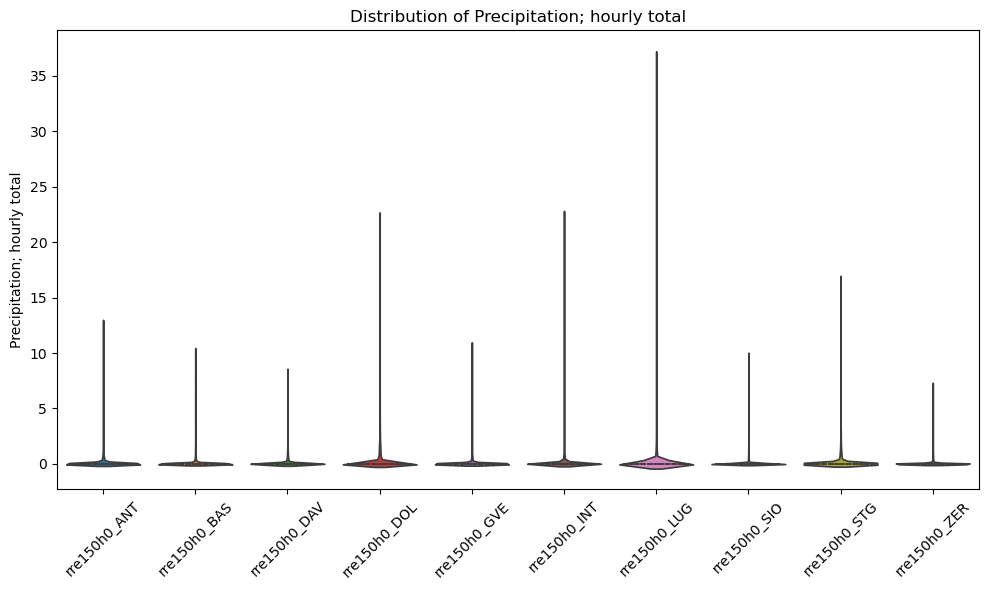

In [70]:
# plot violin plots for rre columns

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[rre_cols], inner="quartile")
plt.title("Distribution of Precipitation; hourly total")
plt.ylabel("Precipitation; hourly total")   
plt.xticks(rotation=45)     
plt.tight_layout()
plt.show()


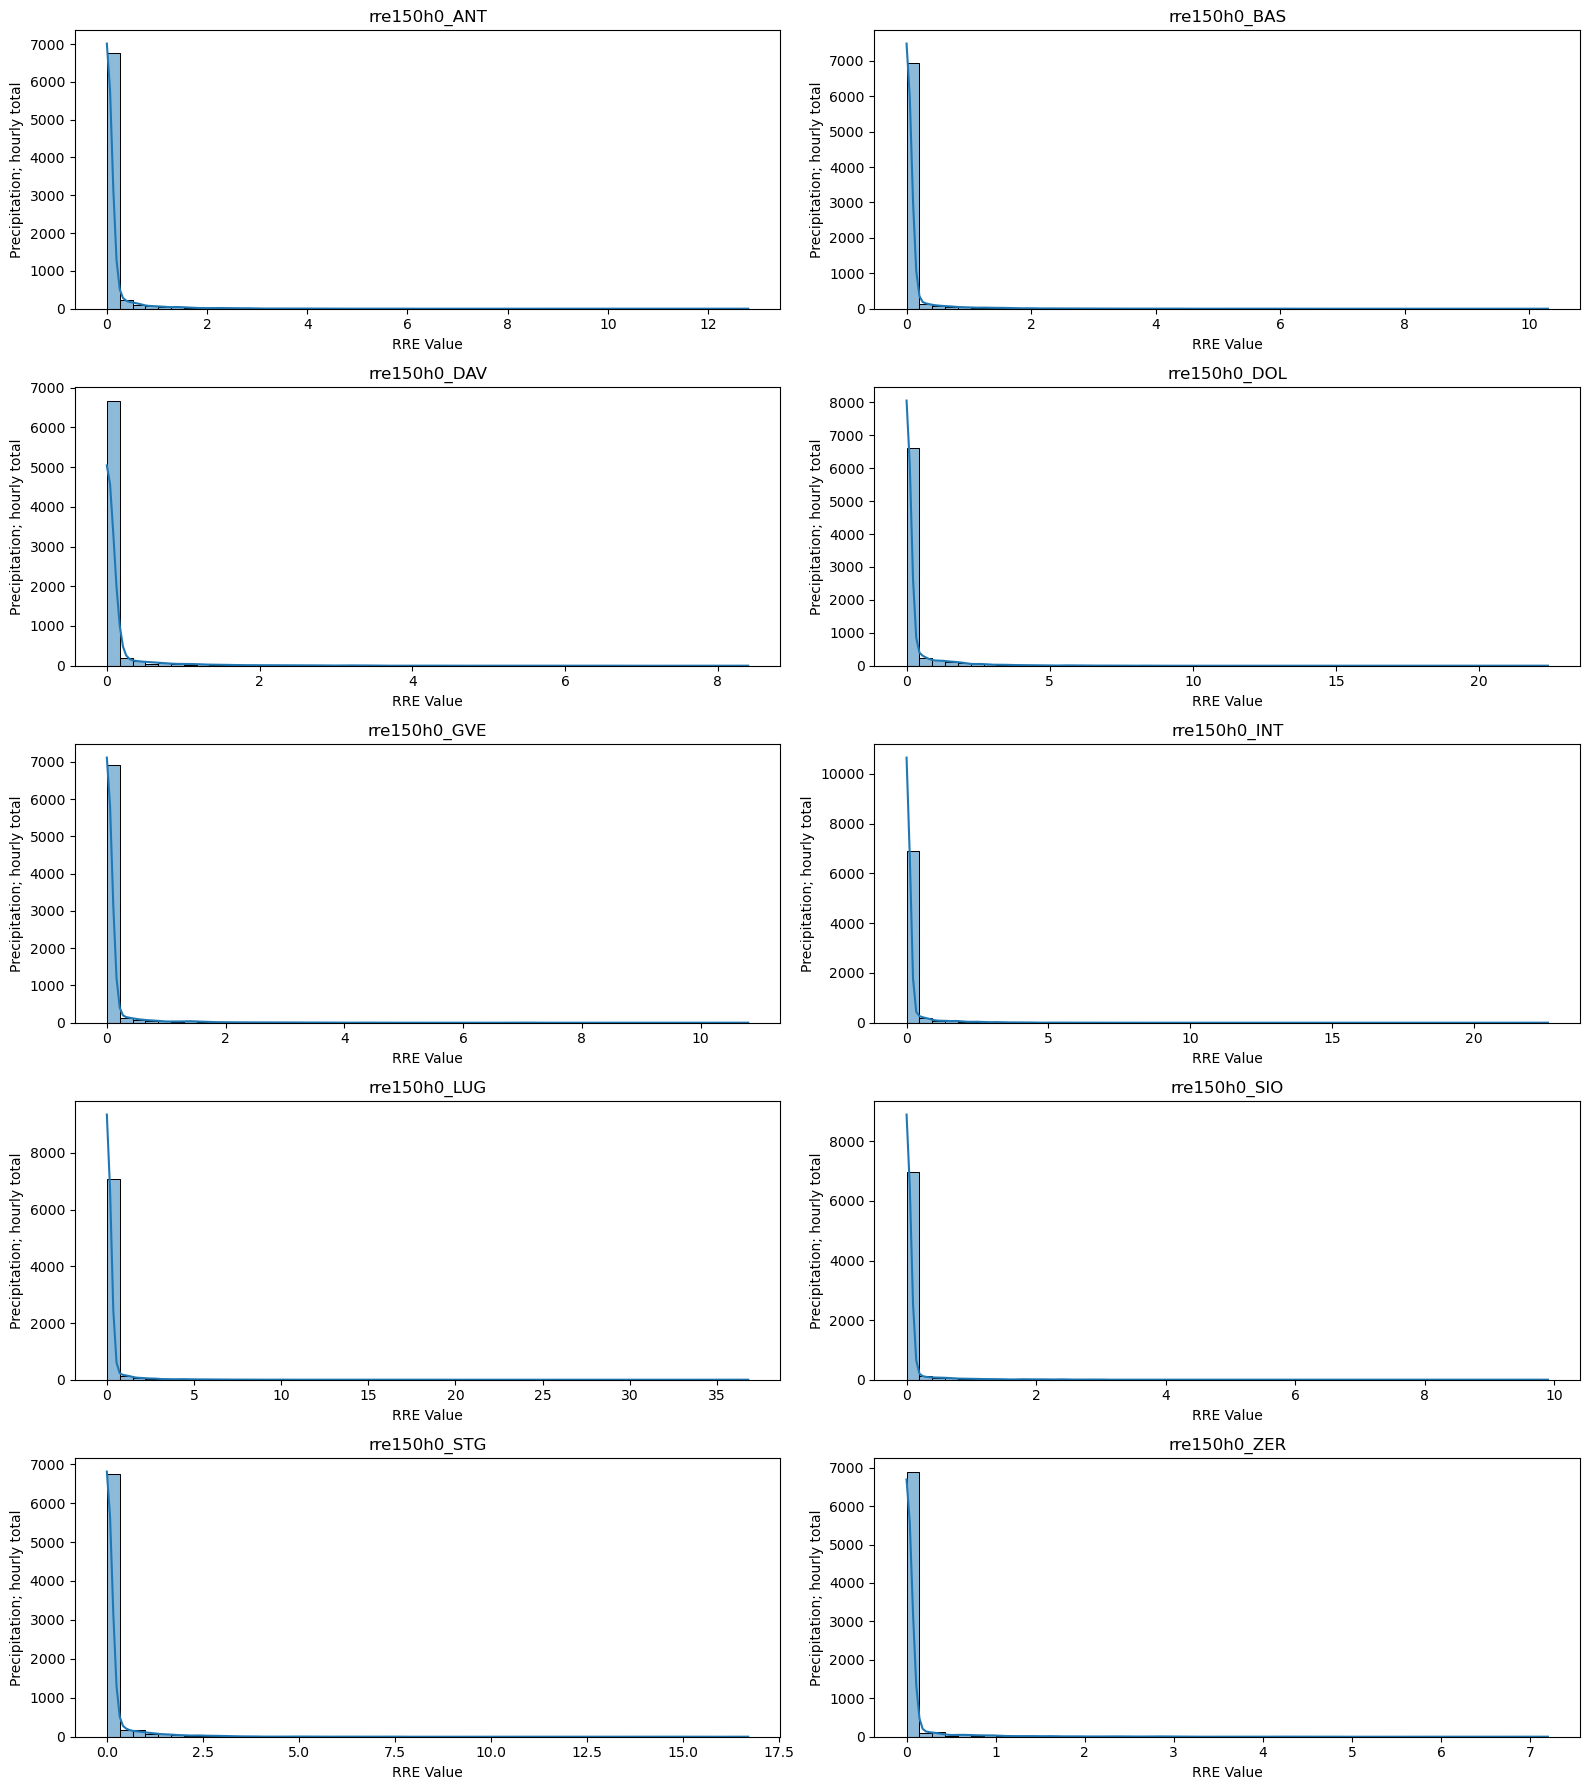

In [71]:
# plot density plots for each rre column

plt.figure(figsize=(16, 18))
for i, col in enumerate(rre_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(weather_copy[col], kde=True, bins=50)
    plt.title(col)
    plt.xlabel("RRE Value")
    plt.ylabel("Precipitation; hourly total")

plt.tight_layout()
plt.show()

The data is extremly rightly skewed -> need to make it follow normal distribution 

### 2.2.2 Tranformations applied to RRE (box-cox, capping, robust standard scaller) & keep all the variables in RRE because the correlation is low

In [72]:
#Apply 2% upper cap 

for col in rre_cols:
    upper = weather_copy[col].quantile(0.98)
    weather_copy[col] = np.clip(weather_copy[col], None, upper)

# Apply box-cox to all rre variables and also standardize them 

weather_copy[rre_cols] = weather_copy[rre_cols].apply(
   lambda x: boxcox(x + 1e-6)[0])

scaler = RobustScaler()
weather_copy[rre_cols] = scaler.fit_transform(weather_copy[rre_cols])

# Show all remaining RRE-related columns
print("Remaining RRE-related columns:",
      [col for col in weather_copy.columns if "rre" in col])


Remaining RRE-related columns: ['rre150h0_ANT', 'rre150h0_BAS', 'rre150h0_DAV', 'rre150h0_DOL', 'rre150h0_GVE', 'rre150h0_INT', 'rre150h0_LUG', 'rre150h0_SIO', 'rre150h0_STG', 'rre150h0_ZER']


## 2.3 Sunshine Duration - SRE columns

### 2.3.1 Sunshine Duration distribution distribution to check skewness and violin plots to check for outliers

In [73]:
sre_cols = ['sre000h0_ANT','sre000h0_BAS','sre000h0_DAV','sre000h0_DOL','sre000h0_GVE','sre000h0_INT','sre000h0_LUG','sre000h0_SIO','sre000h0_STG','sre000h0_ZER']

##### 2.4.1.1 Violin plot

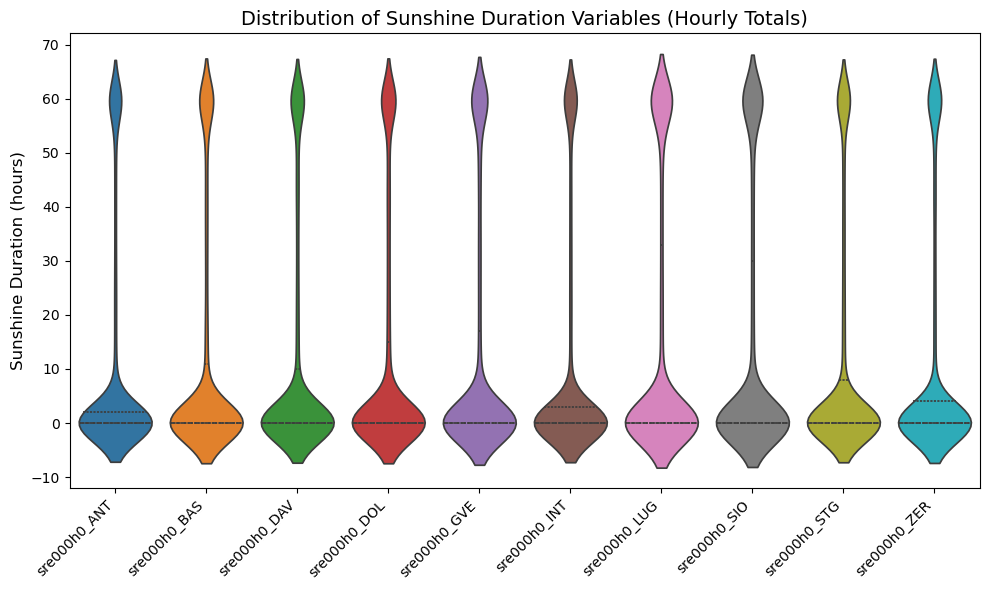

In [74]:
# Plot violin plots for sre columns

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[sre_cols], inner="quartile")

plt.title("Distribution of Sunshine Duration Variables (Hourly Totals)", fontsize=14)
plt.ylabel("Sunshine Duration (hours)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2.3.1.2 Variable distribution

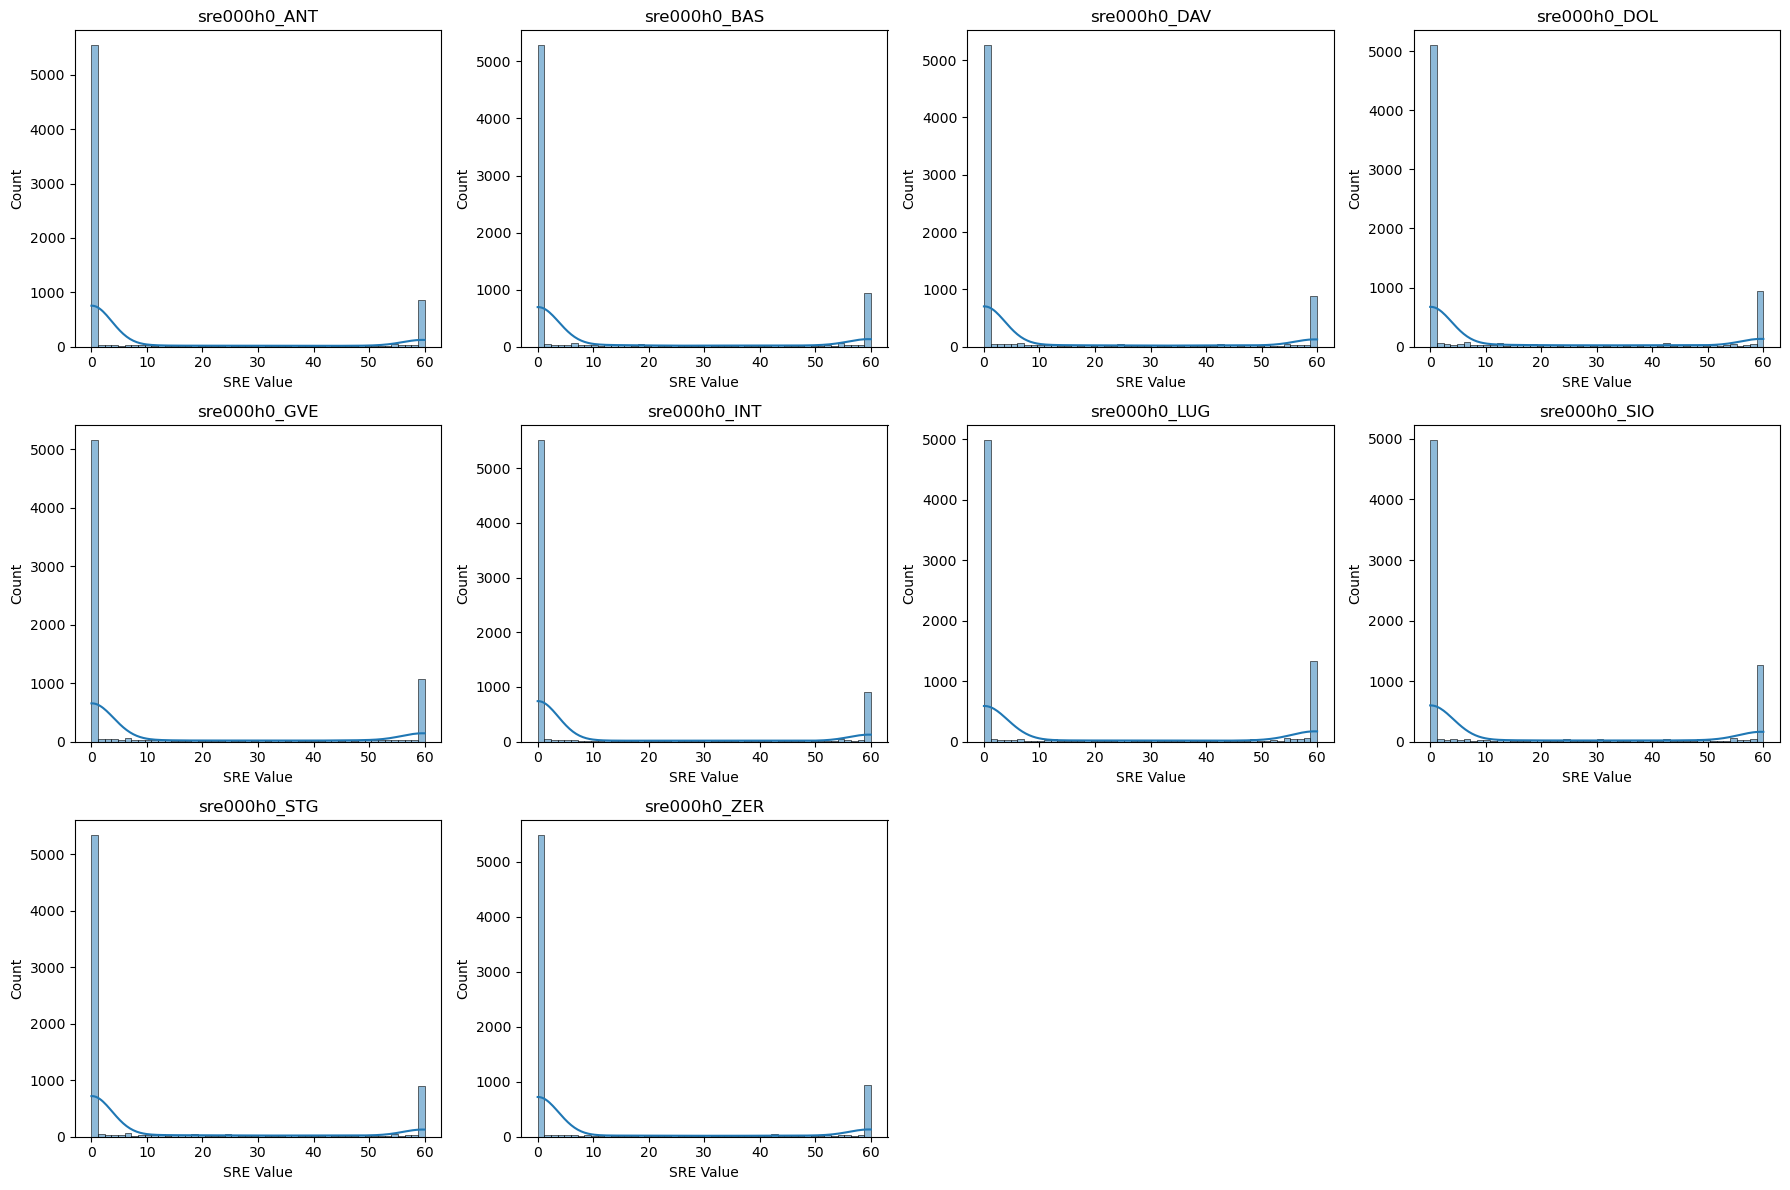

In [75]:
# plot density plots for each sre column 

plt.figure(figsize=(18, 12))

for i, col in enumerate(sre_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(weather_copy[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("SRE Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


Again we see a highly right skewed data 

### 2.3.2 Apply transformations to the variable

In [76]:
#Compute mean and std of all SRE columns
weather_copy["sre000h0_mean"] = weather_copy[sre_cols].mean(axis=1)
weather_copy["sre000h0_std"]  = weather_copy[sre_cols].std(axis=1)

#Apply box-cox 

weather_copy["bc_sre000h0_mean"] = boxcox(weather_copy["sre000h0_mean"] + 1e-6)[0]
weather_copy["bc_sre000h0_std"]  = boxcox(weather_copy["sre000h0_std"]  + 1e-6)[0]

#Standardize both log-transformed variables
scaler = RobustScaler()
weather_copy[["bc_sre000h0_mean", "bc_sre000h0_std"]] = scaler.fit_transform(
    weather_copy[["bc_sre000h0_mean", "bc_sre000h0_std"]]
)

#Drop the original SRE columns and unscaled mean/std
weather_copy = weather_copy.drop(columns=sre_cols + ["sre000h0_mean", "sre000h0_std"])

#Verify what remains
print("Remaining SRE-related columns:",
      [col for col in weather_copy.columns if "sre000h0" in col])


Remaining SRE-related columns: ['bc_sre000h0_mean', 'bc_sre000h0_std']


## 2.4 Global Radiation - GRE Columns

### 2.4.1 Visualize GRE distribution to check for skewness and violin plot to check for outliers

In [77]:
gre_cols = ['gre000h0_ANT','gre000h0_BAS','gre000h0_DAV','gre000h0_DOL','gre000h0_GVE','gre000h0_INT','gre000h0_LUG','gre000h0_SIO','gre000h0_STG','gre000h0_ZER']

##### 2.4.1.1 Violin plots

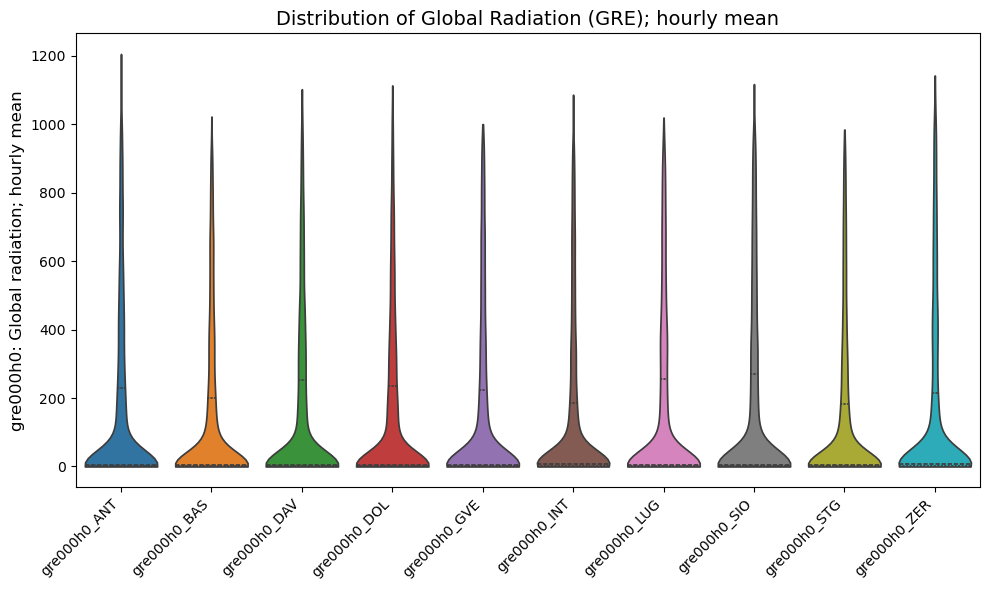

In [78]:
# plot violin plots for gre columns

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[gre_cols], inner="quartile", cut=0)  # cut=0 prevents fake negatives

plt.title("Distribution of Global Radiation (GRE); hourly mean", fontsize=14)
plt.ylabel("gre000h0: Global radiation; hourly mean", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2.4.1.2 Distribution of global radiation

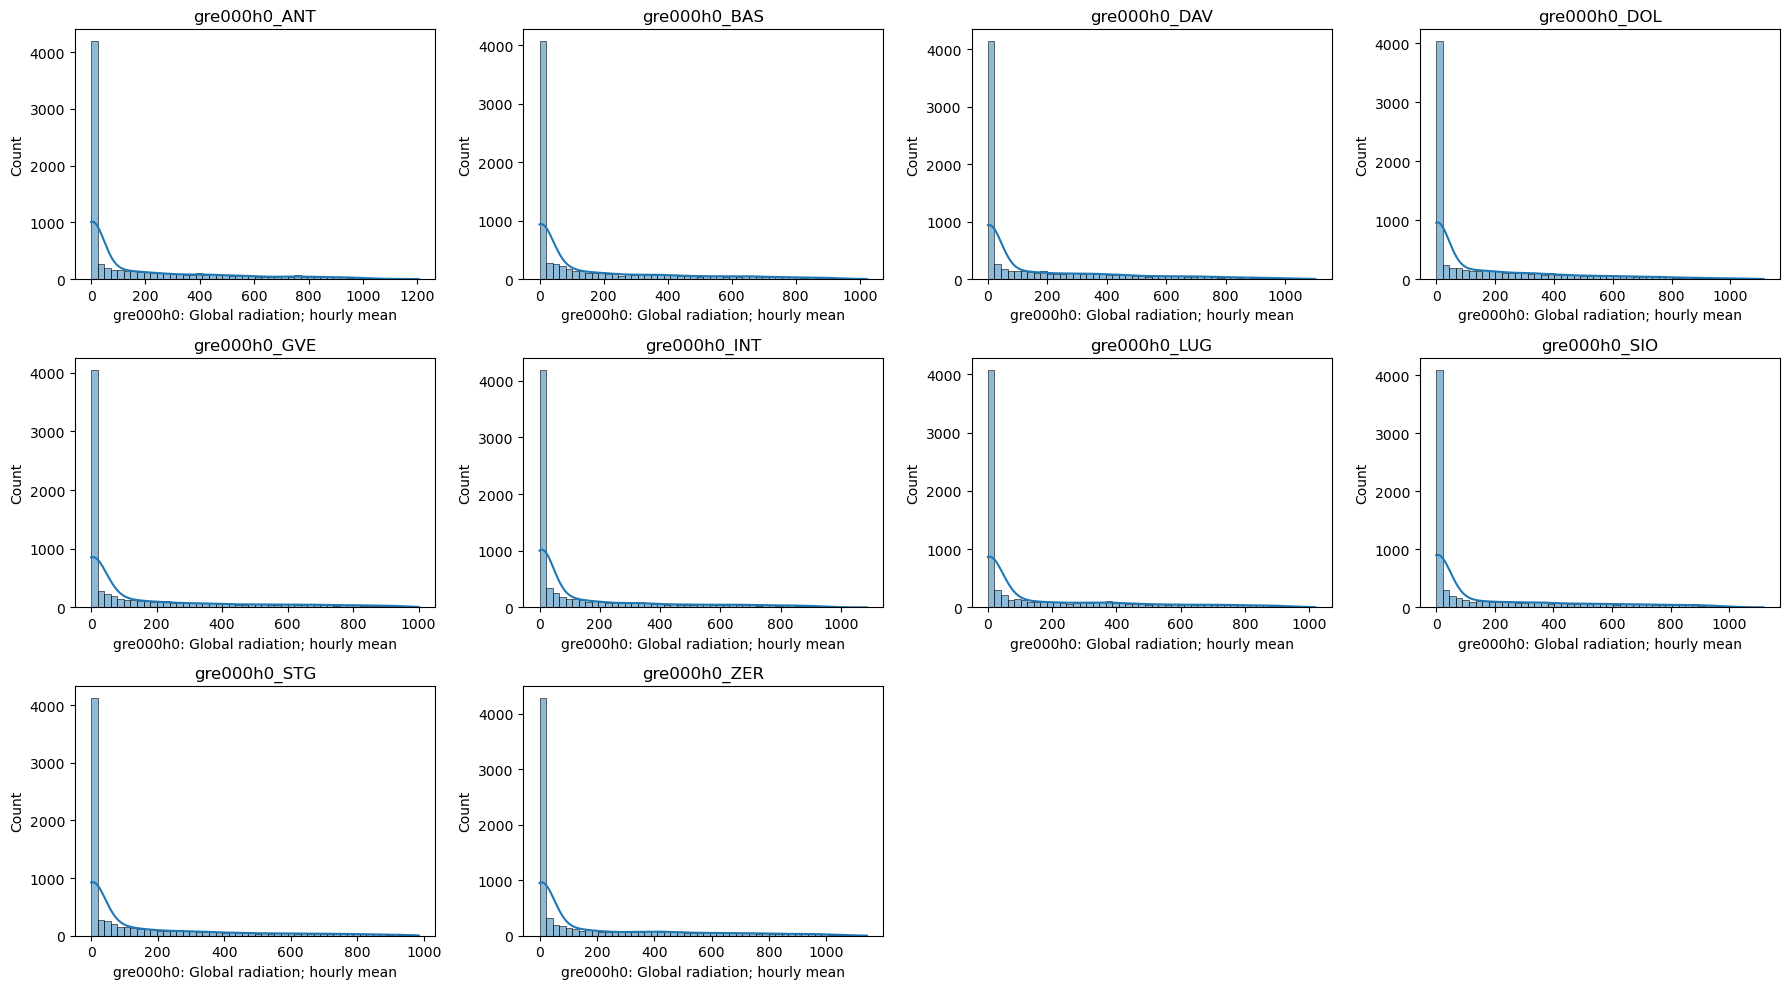

In [79]:
# plot density plots for each gre column

plt.figure(figsize=(18, 10))
for i, col in enumerate(gre_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(weather_copy[col], kde=True, bins=50)
    plt.title(col)
    plt.xlabel("gre000h0: Global radiation; hourly mean")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### 2.4.2 Apply the necessary transformation 

In [80]:
#Compute mean and std of all gre columns
weather_copy["gre000h0_mean"] = weather_copy[gre_cols].mean(axis=1)
weather_copy["gre000h0_std"]  = weather_copy[gre_cols].std(axis=1)


#Box-Cox transform both mean and std (reduce skewness)
weather_copy["bc_gre000h0_mean"] = boxcox(weather_copy["gre000h0_mean"] + 1e-6)[0]
weather_copy["bc_gre000h0_std"]  = boxcox(weather_copy["gre000h0_std"]  + 1e-6)[0]

#Standardize both Box-Cox transformed variables
scaler = RobustScaler()
weather_copy[["bc_gre000h0_mean", "bc_gre000h0_std"]] = scaler.fit_transform(
    weather_copy[["bc_gre000h0_mean", "bc_gre000h0_std"]]
)

#Drop original gre columns and unscaled mean/std
weather_copy = weather_copy.drop(columns=gre_cols + ["gre000h0_mean", "gre000h0_std"])

#Verify what's 
# left
print("Remaining GRE-related columns:",
      [col for col in weather_copy.columns if "gre000h0" in col])

Remaining GRE-related columns: ['bc_gre000h0_mean', 'bc_gre000h0_std']


## 2.7 Wind Speed and Gust Peak - FKL Columns

### 2.7.1 Wind speed distribution to check for skewness and violin plots to check for outliers

In [81]:
fkl_cols= ['fkl010h0_ANT','fkl010h0_BAS','fkl010h0_DAV','fkl010h0_DOL','fkl010h0_GVE','fkl010h0_INT','fkl010h0_LUG','fkl010h0_SIO','fkl010h0_STG','fkl010h0_ZER','fkl010h3_ANT',
 'fkl010h3_BAS','fkl010h3_DAV','fkl010h3_DOL','fkl010h3_GVE','fkl010h3_INT','fkl010h3_LUG','fkl010h3_SIO','fkl010h3_STG','fkl010h3_ZER']

##### 2.7.1.1 Violin plots fkl010h0

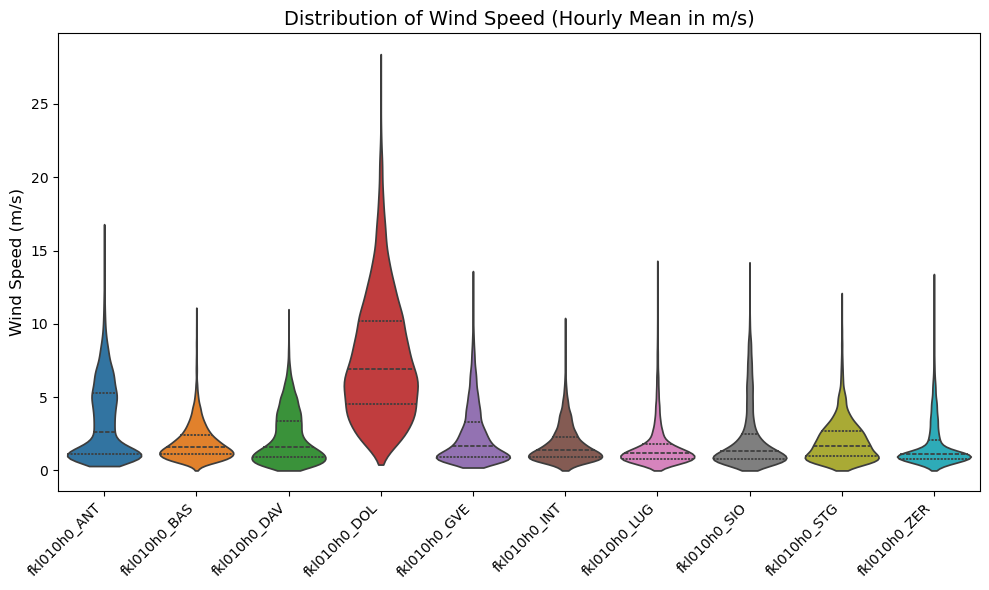

In [82]:
# plot violin plots for fkl010h0 columns

fkl010h0_cols = [col for col in fkl_cols if "fkl010h0" in col]

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[fkl010h0_cols], inner="quartile", cut=0)

plt.title("Distribution of Wind Speed (Hourly Mean in m/s)", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2.7.1.2 Violin plots for fkl010h3 ("gust peak")

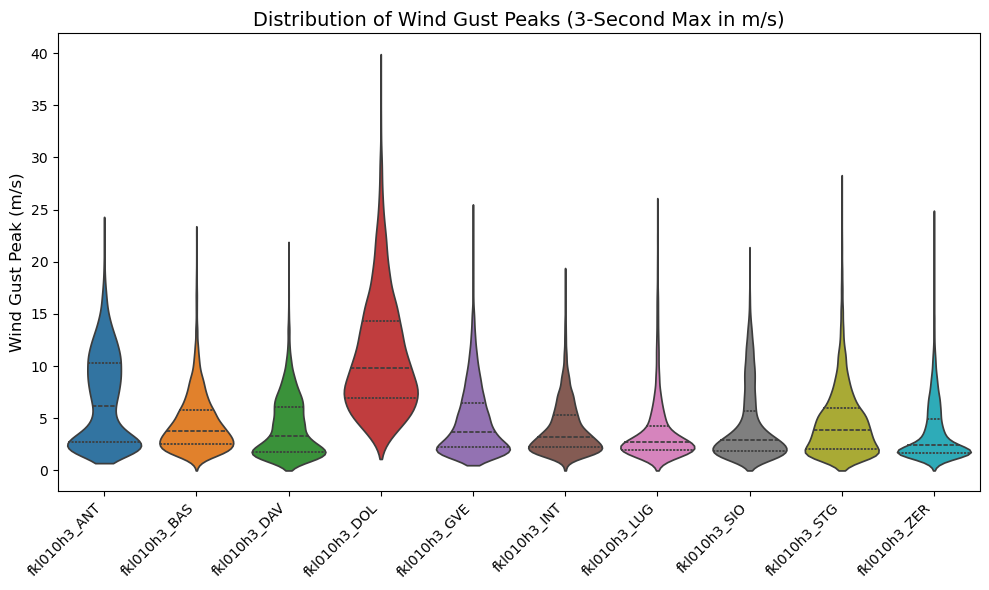

In [83]:
# plot violin plots for fkl010h3 columns

fkl010h3_cols = [col for col in fkl_cols if "fkl010h3" in col]

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[fkl010h3_cols], inner="quartile", cut=0)

plt.title("Distribution of Wind Gust Peaks (3-Second Max in m/s)", fontsize=14)
plt.ylabel("Wind Gust Peak (m/s)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2.7.1.3 Distribution of the variables 

0.36239485589124226


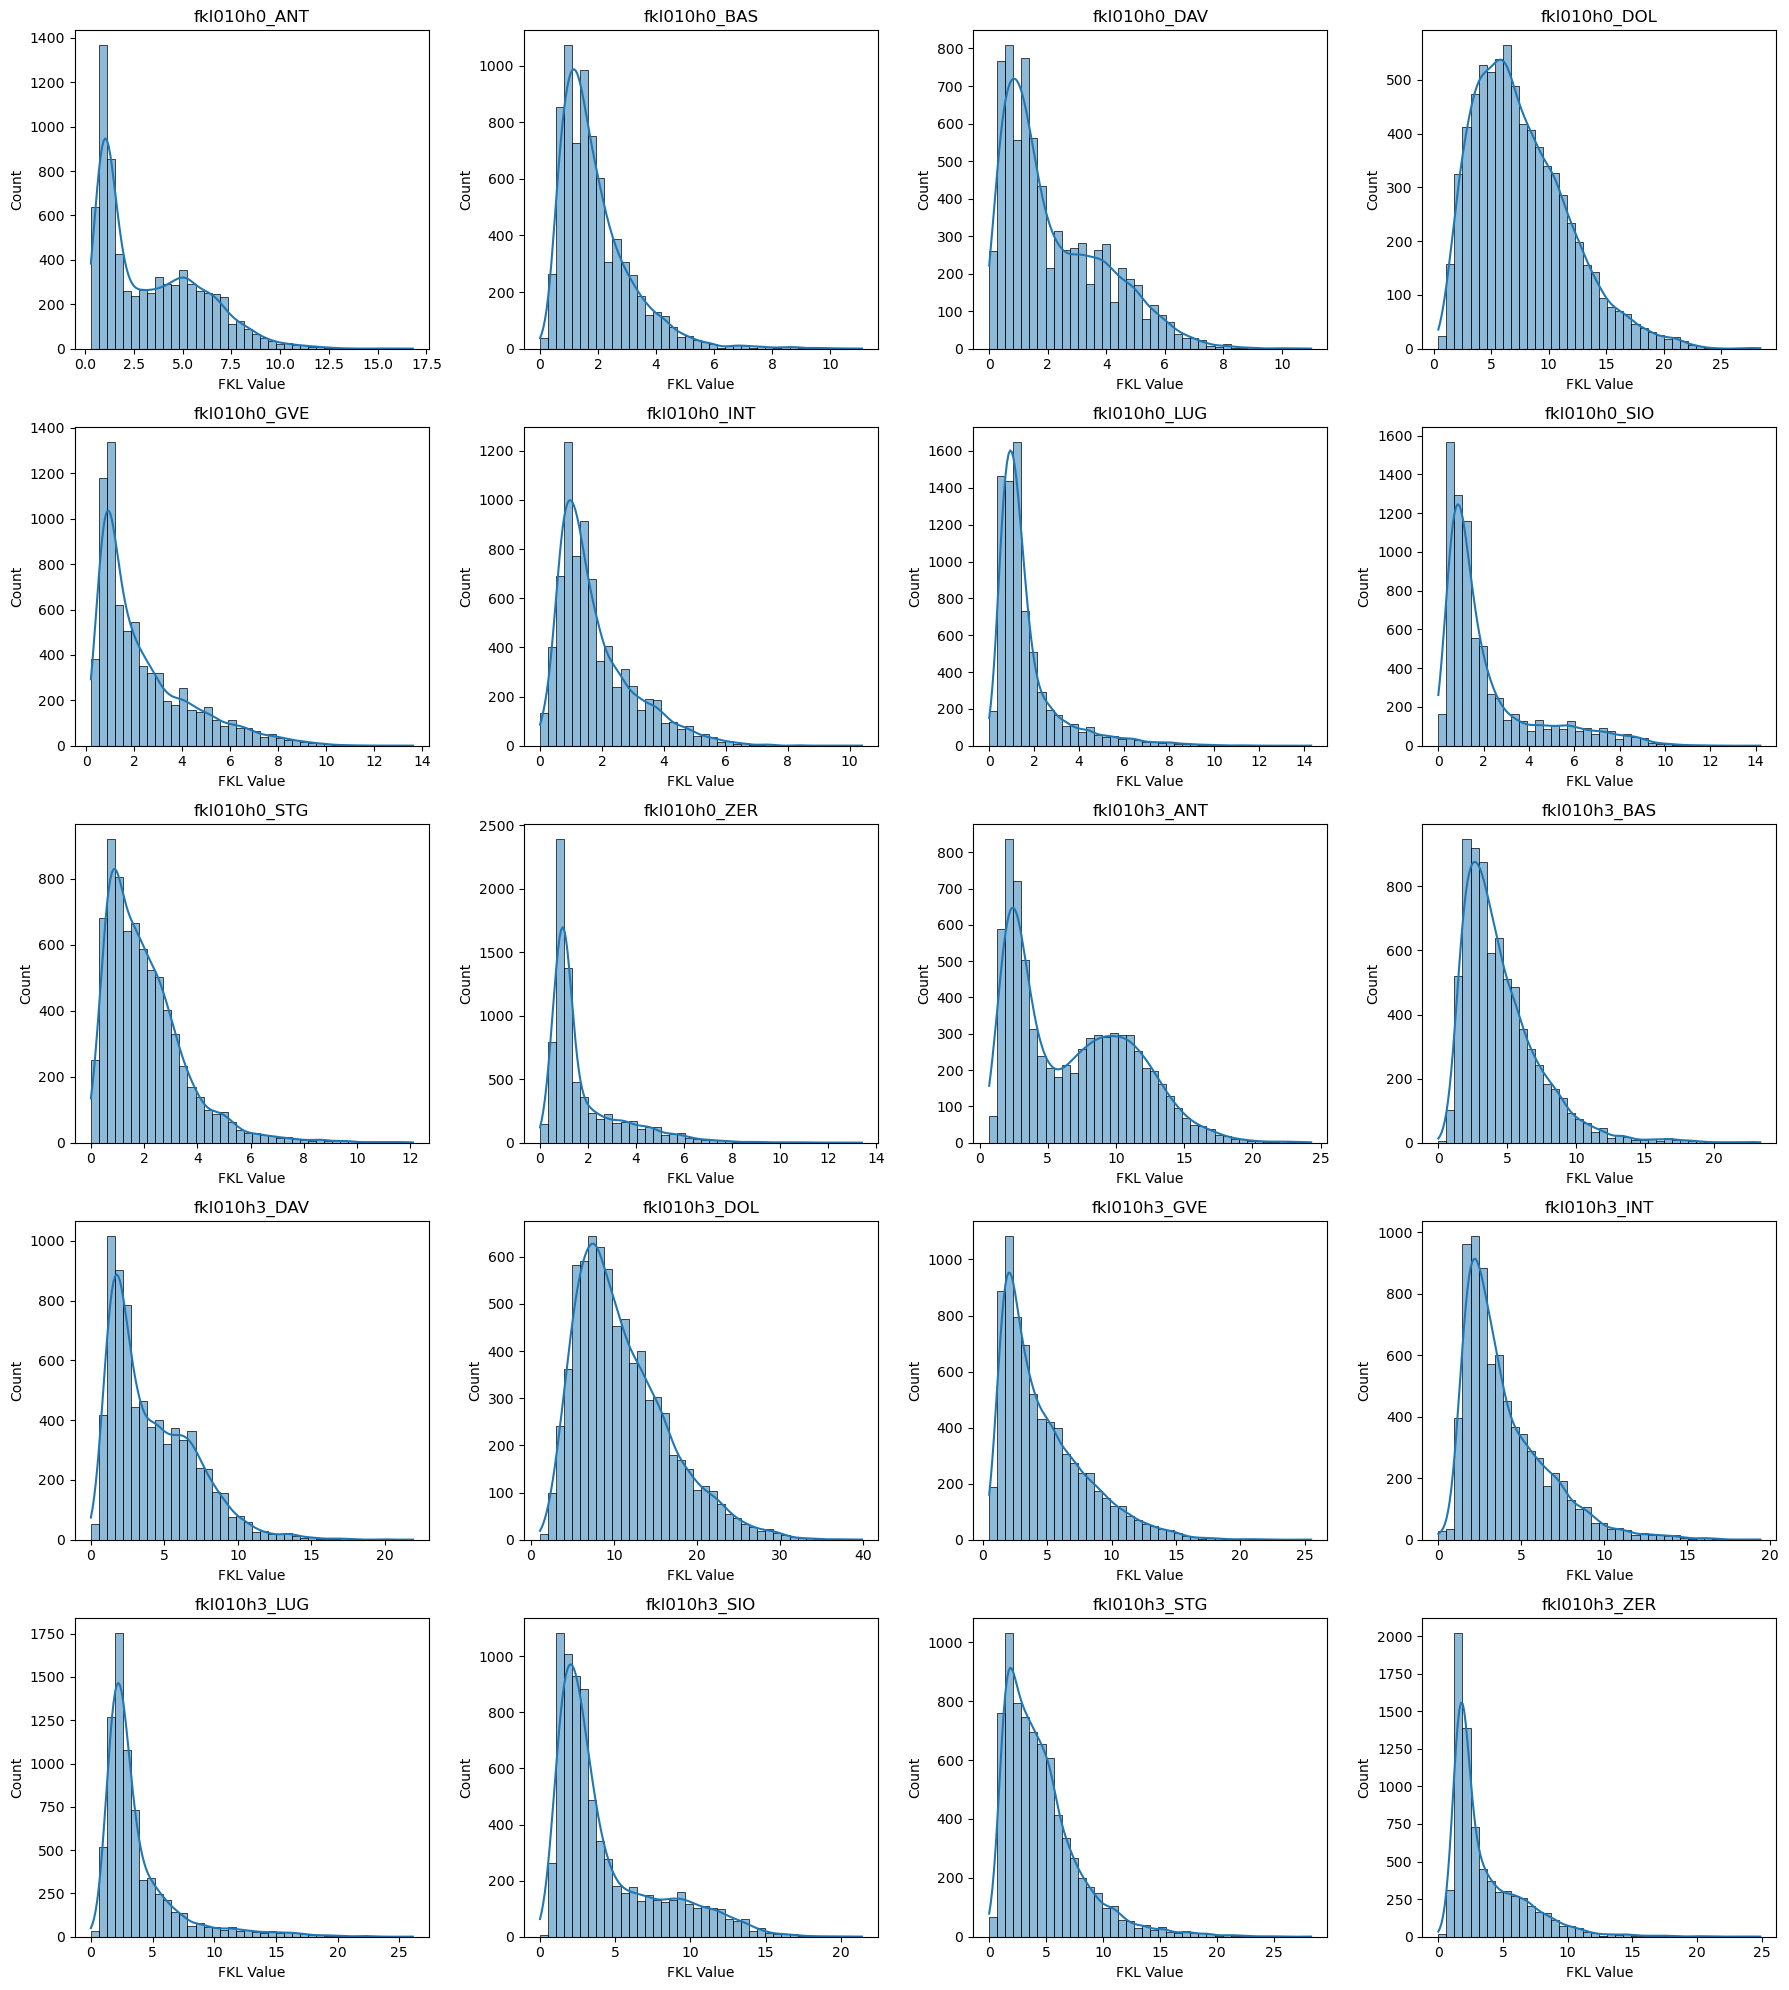

In [84]:
# plot density plots for each fkl column

fkl_cols= ['fkl010h0_ANT','fkl010h0_BAS','fkl010h0_DAV','fkl010h0_DOL','fkl010h0_GVE','fkl010h0_INT','fkl010h0_LUG','fkl010h0_SIO','fkl010h0_STG','fkl010h0_ZER','fkl010h3_ANT',
 'fkl010h3_BAS','fkl010h3_DAV','fkl010h3_DOL','fkl010h3_GVE','fkl010h3_INT','fkl010h3_LUG','fkl010h3_SIO','fkl010h3_STG','fkl010h3_ZER']

print(weather_copy[fkl_cols].corr().mean().mean())

# Plot settings
plt.figure(figsize=(18, 20))

for i, col in enumerate(fkl_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(weather_copy[col], kde=True, bins=40)
    plt.title(col)
    plt.xlabel("FKL Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 2.7.2 Wind speed columns transformation 

In [85]:
# Upper cap at 2%
upper = weather_copy[fkl_cols].quantile(0.98)
weather_copy[fkl_cols] = weather_copy[fkl_cols].clip(None, upper, axis=1)

# Apply Box-Cox transformation (overwriting original columns)
weather_copy[fkl_cols] = weather_copy[fkl_cols].apply(
    lambda x: boxcox(x + 1e-6)[0]
)

# Standardize the Box-Cox transformed variables
scaler = RobustScaler()
weather_copy[fkl_cols] = scaler.fit_transform(weather_copy[fkl_cols])


# Show all remaining FKL-related columns
print("Remaining FKL-related columns:",
      [col for col in weather_copy.columns if "fkl" in col])

Remaining FKL-related columns: ['fkl010h0_ANT', 'fkl010h0_BAS', 'fkl010h0_DAV', 'fkl010h0_DOL', 'fkl010h0_GVE', 'fkl010h0_INT', 'fkl010h0_LUG', 'fkl010h0_SIO', 'fkl010h0_STG', 'fkl010h0_ZER', 'fkl010h3_ANT', 'fkl010h3_BAS', 'fkl010h3_DAV', 'fkl010h3_DOL', 'fkl010h3_GVE', 'fkl010h3_INT', 'fkl010h3_LUG', 'fkl010h3_SIO', 'fkl010h3_STG', 'fkl010h3_ZER']


## 2.8 Atmospheric pressure reduced to sea level; hourly mean - QFF columns

### 2.8.1 Visualize the distribution to check for skewness and violin plot to control for outliers

In [86]:
pp_cols = ['pp0qffh0_BAS', 'pp0qffh0_GVE', 'pp0qffh0_INT','pp0qffh0_LUG', 'pp0qffh0_SIO']

##### 2.8.1.1 Violin Plots

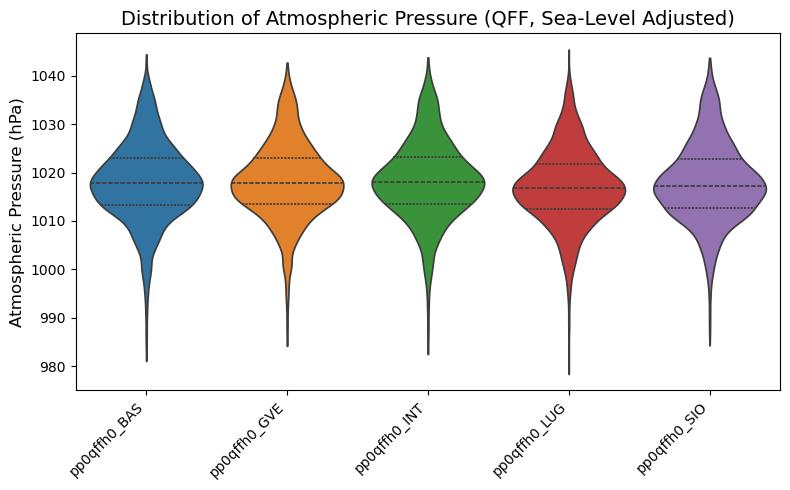

In [87]:
# plot violin plots for pp0qffh0 columns

plt.figure(figsize=(8,5))
sns.violinplot(data=weather_copy[pp_cols], inner="quartile", cut=0)

plt.title("Distribution of Atmospheric Pressure (QFF, Sea-Level Adjusted)", fontsize=14)
plt.ylabel("Atmospheric Pressure (hPa)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2.8.1.2 Distribution of the variable

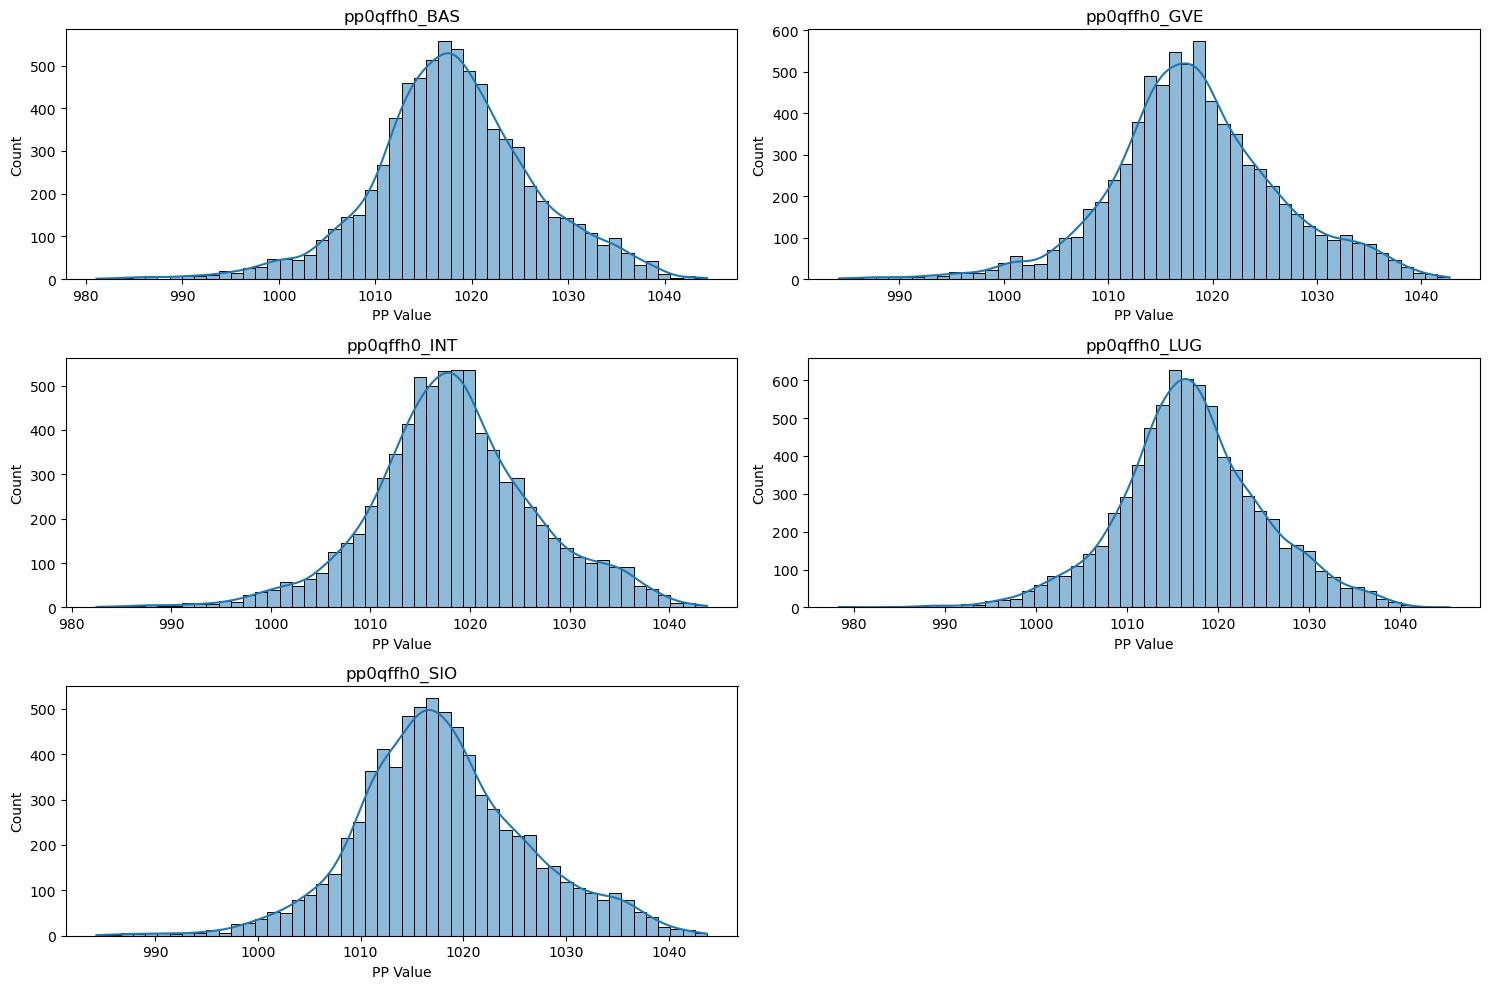

In [88]:
# plot density plots for each pp0qffh0 column

pp_cols = ['pp0qffh0_BAS', 'pp0qffh0_GVE', 'pp0qffh0_INT','pp0qffh0_LUG', 'pp0qffh0_SIO']

# Plot settings
plt.figure(figsize=(15, 10))

for i, col in enumerate(pp_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(weather_copy[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("PP Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 2.8.2 Apply transformations to the variables

In [89]:
#Compute mean and std of all pp0qffh0 columns
weather_copy["pp0qffh0_mean"] = weather_copy[pp_cols].mean(axis=1)
weather_copy["pp0qffh0_std"]  = weather_copy[pp_cols].std(axis=1)
 
# Standardize both mean and std
scaler = RobustScaler()
weather_copy[["pp0qffh0_mean", "pp0qffh0_std"]] = scaler.fit_transform(
    weather_copy[["pp0qffh0_mean", "pp0qffh0_std"]]
)

#Drop original pp0qffh0 columns and unscaled mean/std
weather_copy = weather_copy.drop(columns=pp_cols)

#Verify what's left
print("Remaining PP-related columns:",
      [col for col in weather_copy.columns if "pp0qffh0" in col])


Remaining PP-related columns: ['pp0qffh0_mean', 'pp0qffh0_std']


## 2.9 Atmospheric pressure at barometric altitude; hourly mean - QFE columns

### 2.9.1 visualize data to check for skewness and violin plot to check for outliers

In [90]:
prestah_cols = ['prestah0_ANT', 'prestah0_BAS', 'prestah0_DAV', 'prestah0_DOL','prestah0_GVE', 'prestah0_INT', 'prestah0_LUG', 'prestah0_SIO','prestah0_STG', 'prestah0_ZER']

##### 2.9.1.1 Violin plot

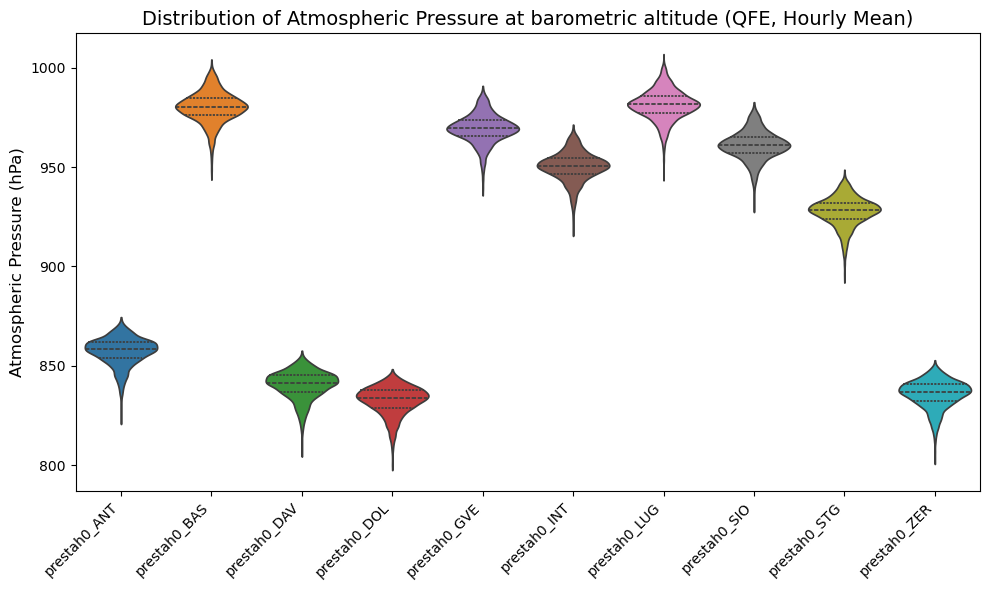

In [91]:
# plot violin plots for prestah0 columns

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[prestah_cols], inner="quartile", cut=0)

plt.title("Distribution of Atmospheric Pressure at barometric altitude (QFE, Hourly Mean)", fontsize=14)
plt.ylabel("Atmospheric Pressure (hPa)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2.9.1.2 Distribution of variable

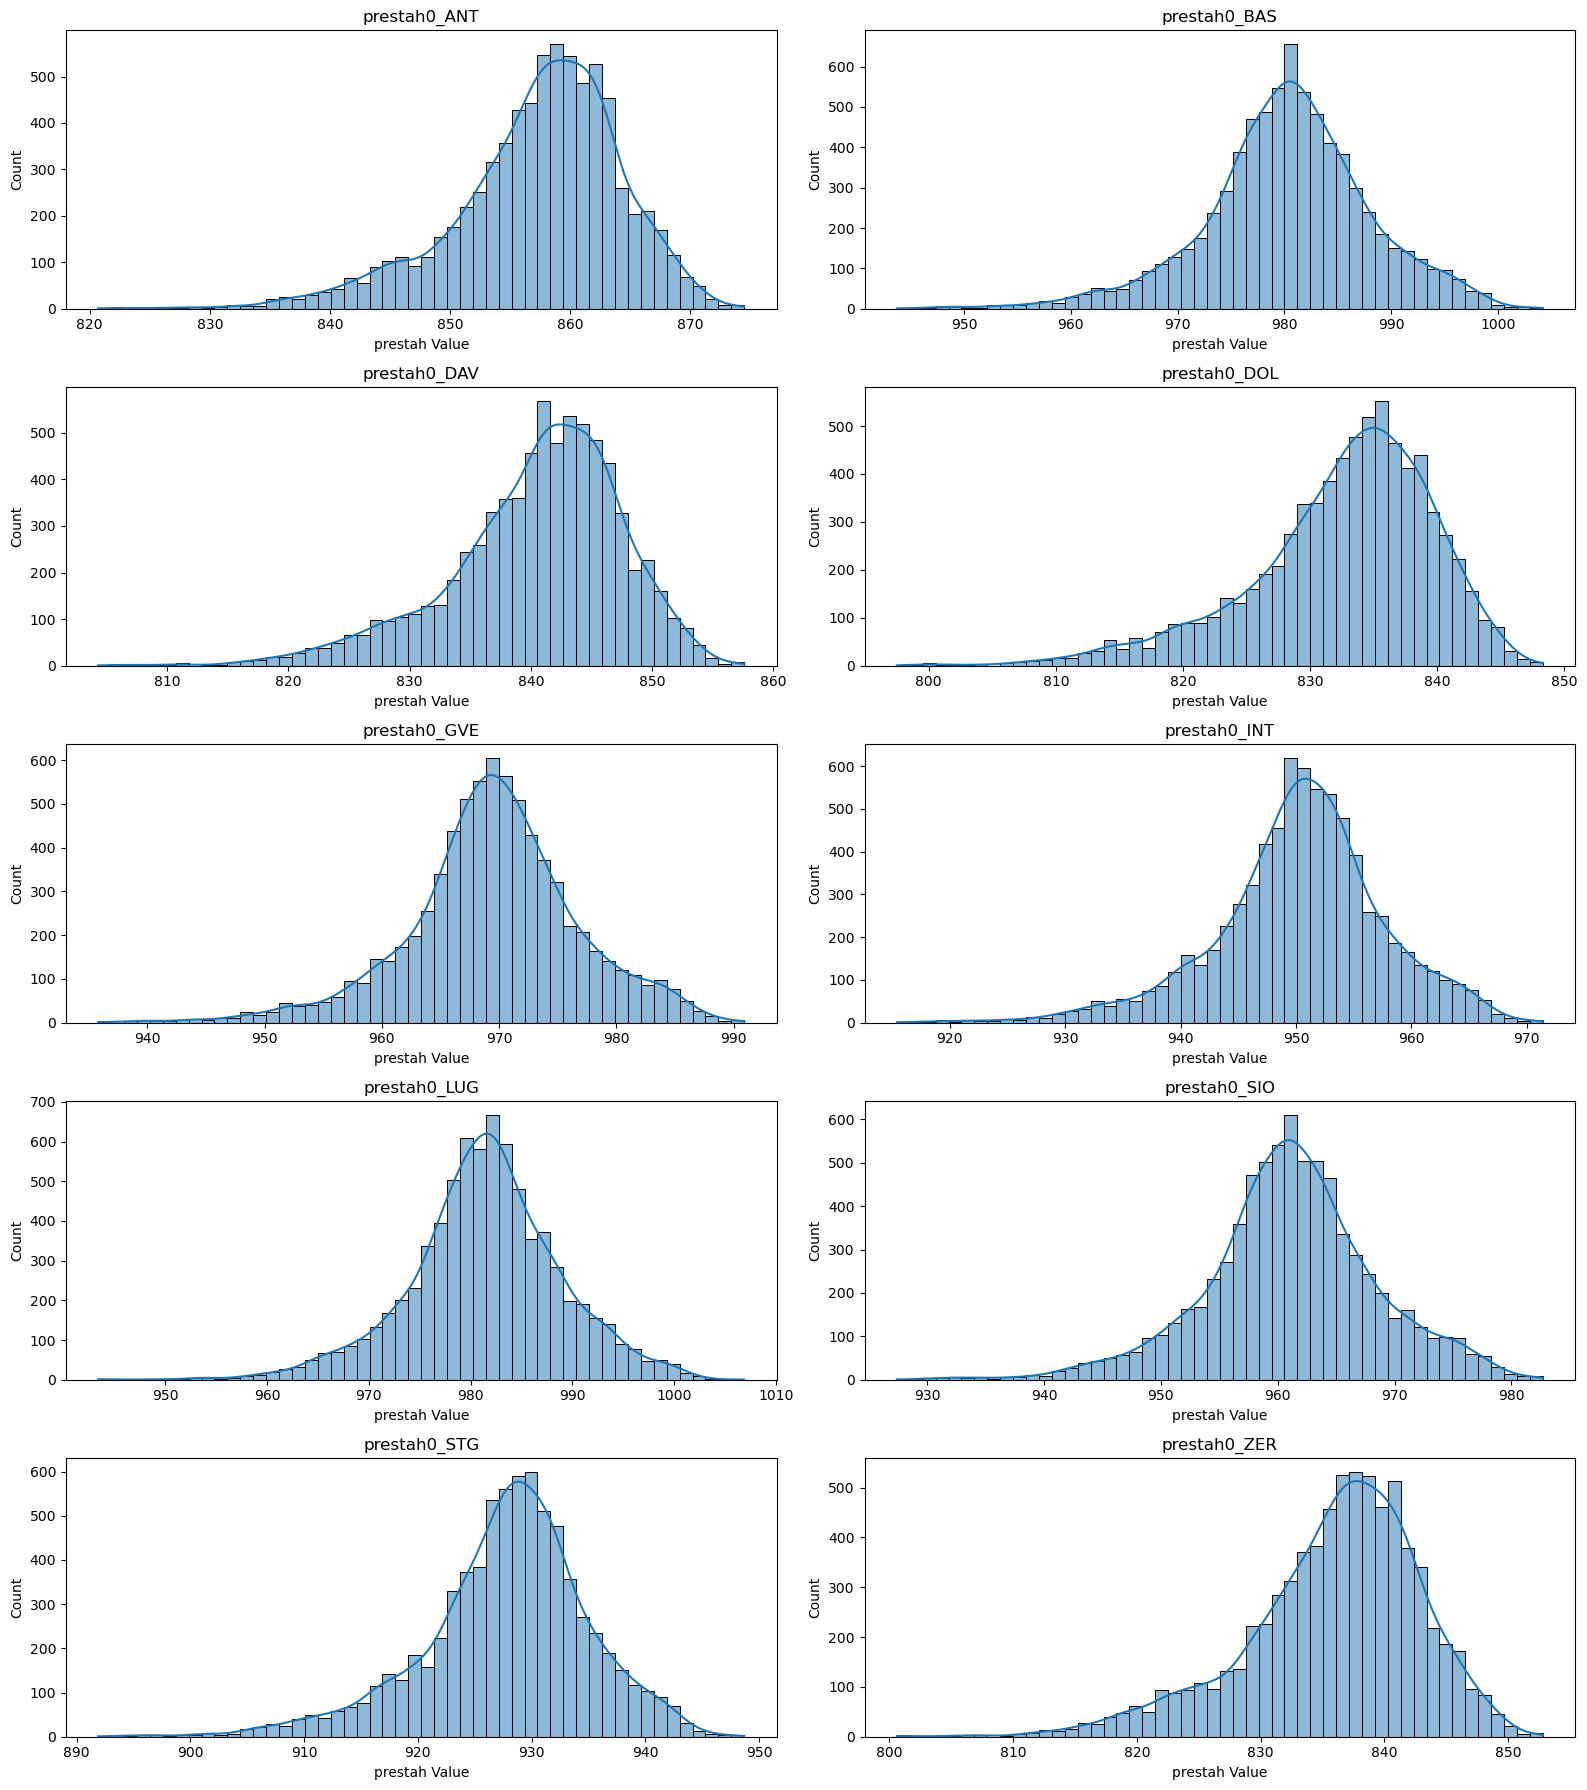

In [92]:
# Plot distribution plots for each prestah0 column

plt.figure(figsize=(16, 18))

for i, col in enumerate(prestah_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(weather_copy[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("prestah Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### 2.9.2 Feature engineering 

In [93]:
#Compute mean and std of all prestah0 columns

weather_copy["prestah0_mean"] = weather_copy[prestah_cols].mean(axis=1)
weather_copy["prestah0_std"]  = weather_copy[prestah_cols].std(axis=1)

#Robustly standardize both mean and std
scaler = RobustScaler()
weather_copy[["prestah0_mean", "prestah0_std"]] = scaler.fit_transform(
    weather_copy[["prestah0_mean", "prestah0_std"]]
)

#Drop original prestah0 columns and unscaled mean/std

weather_copy = weather_copy.drop(columns=prestah_cols)

#Verify what's left

print("Remaining PRESTAH-related columns:",
      [col for col in weather_copy.columns if "prestah0" in col])


Remaining PRESTAH-related columns: ['prestah0_mean', 'prestah0_std']


## 2.10 Relative air humidity 2 m above ground; hourly mean - URE columns

### 2.10.1 Visualize distributions to check for skewness and violin plots to check for outliers

##### 2.10.1.1 Violin plot

In [94]:
ure_cols = ['ure200h0_ANT', 'ure200h0_BAS', 'ure200h0_DAV', 'ure200h0_DOL','ure200h0_GVE', 'ure200h0_INT', 'ure200h0_LUG', 'ure200h0_SIO','ure200h0_STG', 'ure200h0_ZER']

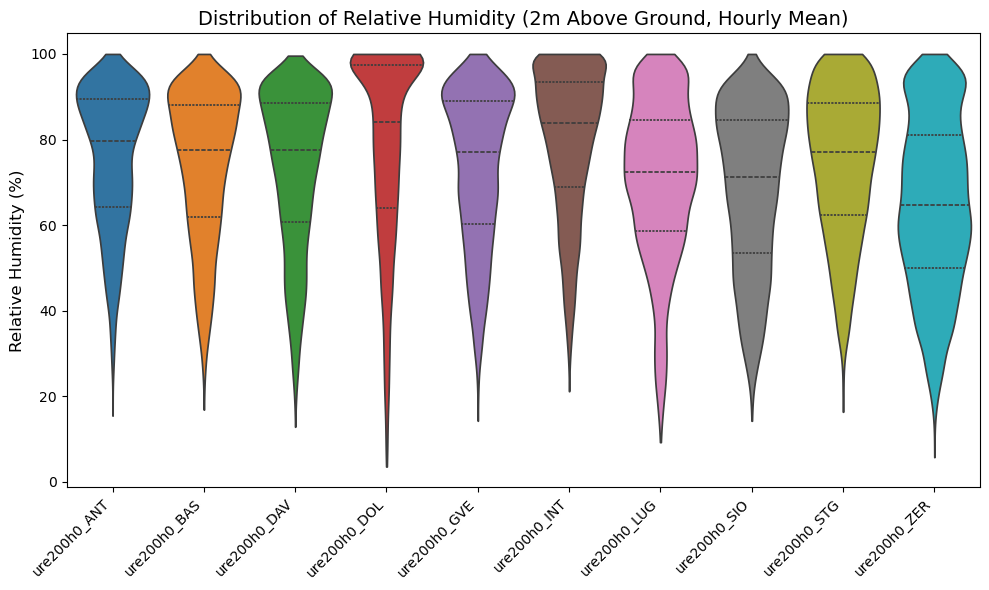

In [95]:
# plot violin plots for ure200h0 columns

plt.figure(figsize=(10,6))
sns.violinplot(data=weather_copy[ure_cols], inner="quartile", cut=0)

plt.title("Distribution of Relative Humidity (2m Above Ground, Hourly Mean)", fontsize=14)
plt.ylabel("Relative Humidity (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##### 2.10.1.2 Distribution of variables 

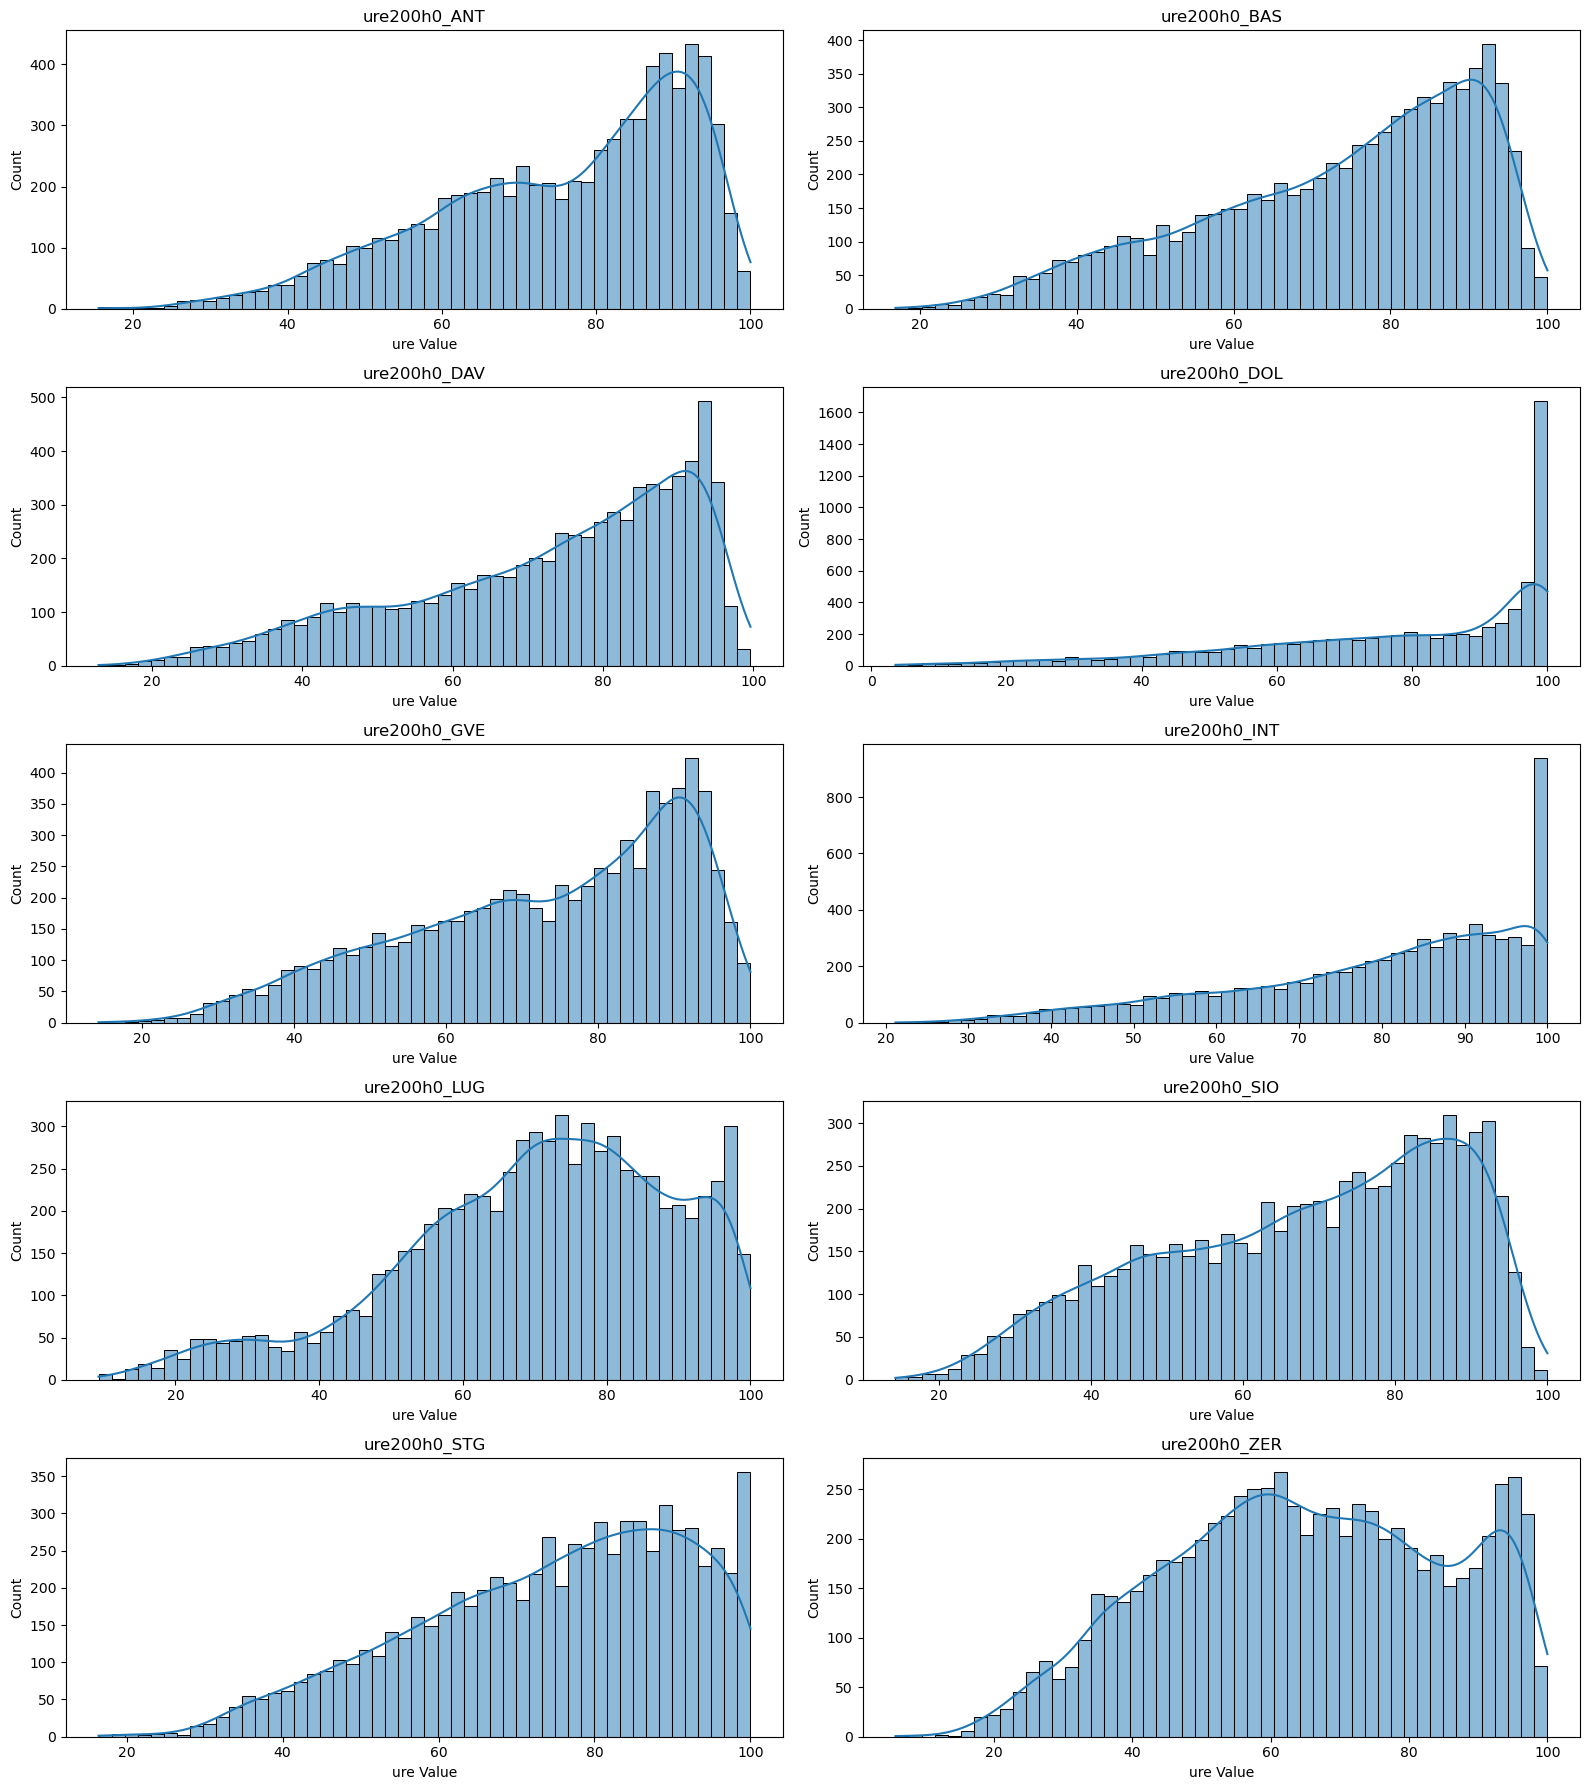

In [96]:
# Plot distribution plots for each ure200h0 column

ure_cols = ['ure200h0_ANT', 'ure200h0_BAS', 'ure200h0_DAV', 'ure200h0_DOL','ure200h0_GVE', 'ure200h0_INT', 'ure200h0_LUG', 'ure200h0_SIO','ure200h0_STG', 'ure200h0_ZER']

weather_copy[ure_cols].corr().mean().mean()

# Plot settings
plt.figure(figsize=(16, 18))

for i, col in enumerate(ure_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(weather_copy[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("ure Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 2.10.2 Apply transformations 

In [97]:
#Standardize the variables

scaler = RobustScaler()
weather_copy[ure_cols] = scaler.fit_transform(weather_copy[ure_cols])

# Show all remaining URE-related columns

print("Remaining URE-related columns:",
      [col for col in weather_copy.columns if "ure200h0" in col])

Remaining URE-related columns: ['ure200h0_ANT', 'ure200h0_BAS', 'ure200h0_DAV', 'ure200h0_DOL', 'ure200h0_GVE', 'ure200h0_INT', 'ure200h0_LUG', 'ure200h0_SIO', 'ure200h0_STG', 'ure200h0_ZER']


## 2.11 Air temperature 2 m above ground (including lag, target and temperature stations) - TRE columns

#### 2.11.1 Correlations between current and target columns + heatmap visualization

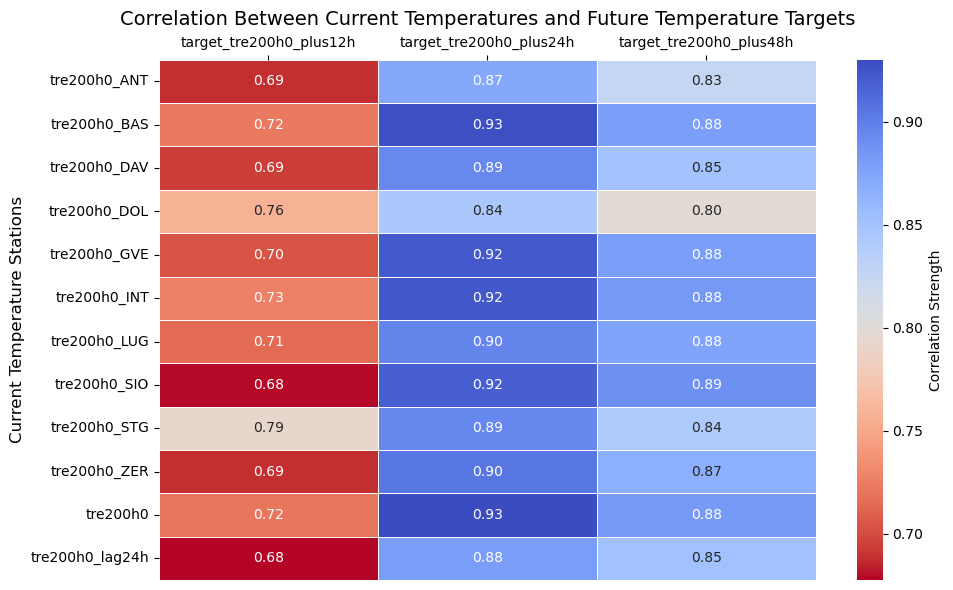

In [98]:
# Compute correlation between current tre200h0 and future targets
current_cols = [
    'tre200h0_ANT', 'tre200h0_BAS', 'tre200h0_DAV', 'tre200h0_DOL',
    'tre200h0_GVE', 'tre200h0_INT', 'tre200h0_LUG', 'tre200h0_SIO',
    'tre200h0_STG', 'tre200h0_ZER', 'tre200h0', 'tre200h0_lag24h'
]

# Define target columns
target_cols = [
    'target_tre200h0_plus12h',
    'target_tre200h0_plus24h',
    'target_tre200h0_plus48h'
]

# Compute correlation matrix
corr_matrix = weather_copy[current_cols + target_cols].corr()

# Extract current to target correlations
current_to_target_corr = corr_matrix.loc[current_cols, target_cols]

plt.figure(figsize=(10,6))

ax = sns.heatmap(current_to_target_corr, 
                 annot=True,
                 cmap="coolwarm_r",
                 fmt=".2f",
                 linewidths=.5,
                 cbar_kws={'label': 'Correlation Strength'}
                )

# Title
plt.title("Correlation Between Current Temperatures and Future Temperature Targets",
          fontsize=14, pad=25)

# Move column labels to the top instead of bottom
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Add axis label under the title 
plt.xlabel("") 
plt.ylabel("Current Temperature Stations", fontsize=12)

# Tick formatting
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

### 2.11.2 Distribution to check for skewness

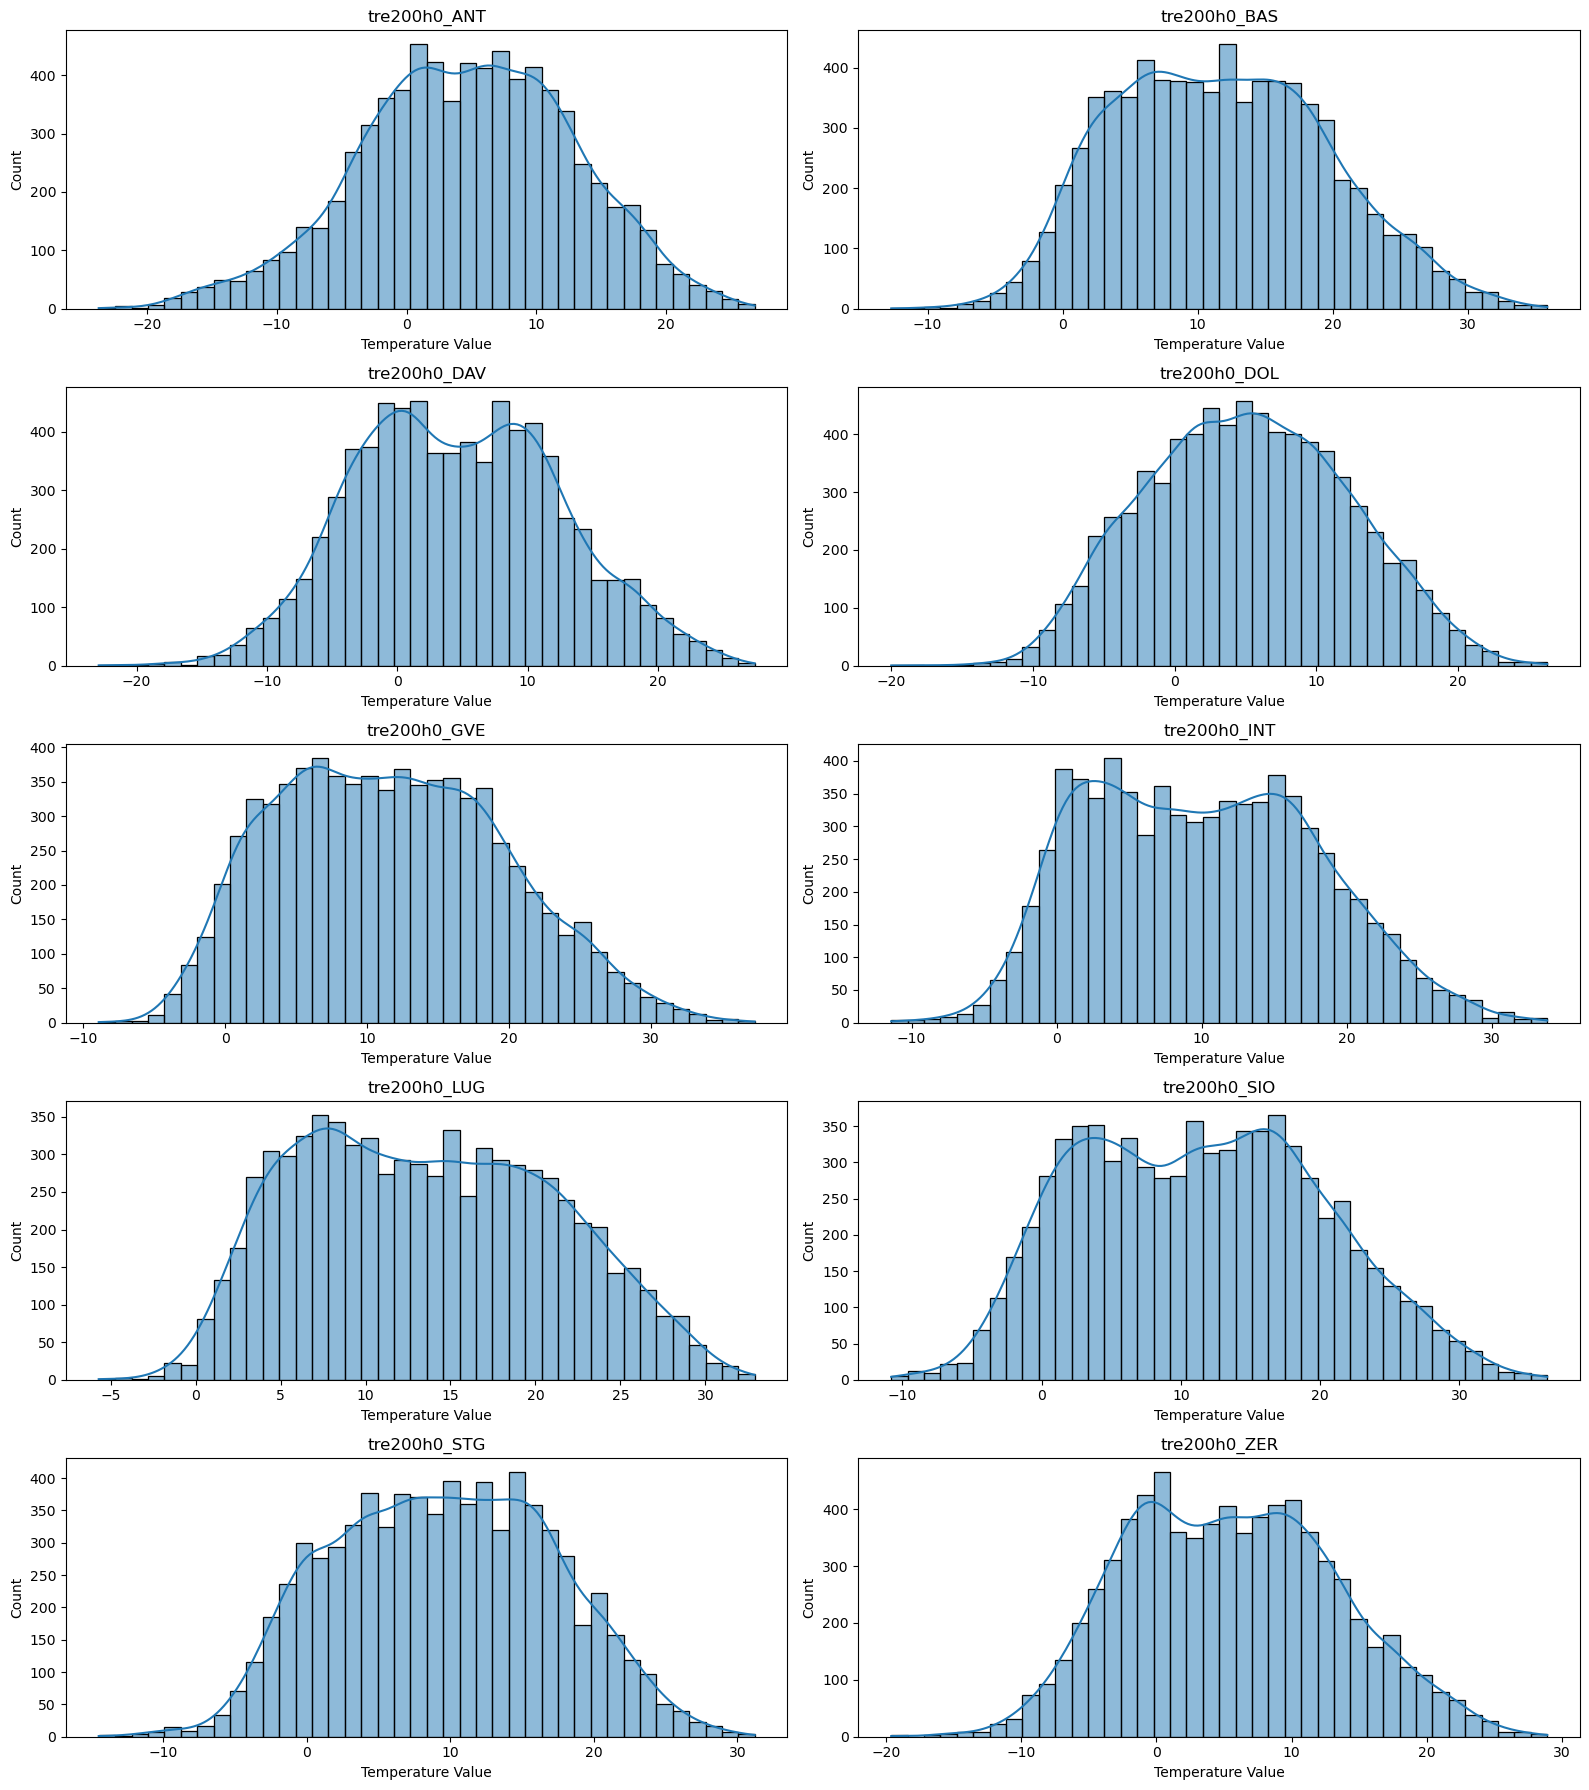

In [99]:
# List of tre temperature columns
tre_cols = ['tre200h0_ANT', 'tre200h0_BAS', 'tre200h0_DAV', 'tre200h0_DOL','tre200h0_GVE', 'tre200h0_INT', 'tre200h0_LUG', 'tre200h0_SIO','tre200h0_STG', 'tre200h0_ZER']

plt.figure(figsize=(16, 18))

for i, col in enumerate(tre_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(weather_copy[col], kde=True, bins=40)
    plt.title(col)
    plt.xlabel("Temperature Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 2.11.3 Apply transformations (take the mean of temperature stations, but keep STG and Bern stations as well as the target_plus columns )

In [100]:
# List of all temperature station columns
tre_cols = ['tre200h0_ANT', 'tre200h0_BAS', 'tre200h0_DAV', 'tre200h0_DOL','tre200h0_GVE', 'tre200h0_INT', 'tre200h0_LUG', 'tre200h0_SIO','tre200h0_STG', 'tre200h0_ZER']

#Compute mean and std across all temperature stations
weather_copy["tre200h0_mean_all"] = weather_copy[tre_cols].mean(axis=1)
weather_copy["tre200h0_std_all"]  = weather_copy[tre_cols].std(axis=1)

#Define columns to scale (NO STG, NO INT)
to_scale = [
    "tre200h0",          # Bern current
    "tre200h0_mean_all", # mean across stations
    "tre200h0_std_all",  # std across stations
    "tre200h0_lag24h",   # Bern lag 24h  
    "tre200h0_STG",     # station STG
      "tre200h0_INT",  # station INT
]

#Standardize all relevant columns
scaler = RobustScaler()
weather_copy[to_scale] = scaler.fit_transform(weather_copy[to_scale])

#Drop redundant station columns (keep Bern, STG, INT, mean, std, and lag)

cols_to_keep = ["tre200h0", "tre200h0_STG", "tre200h0_INT",
                "tre200h0_mean_all", "tre200h0_std_all", "tre200h0_lag24h"]
cols_to_drop = [col for col in tre_cols if col not in ["tre200h0_STG", "tre200h0_INT"]]
weather_copy = weather_copy.drop(columns=cols_to_drop)

#Verify remaining temperature-related columns
print("Remaining temperature-related columns:",
      [col for col in weather_copy.columns if "tre200h0" in col])

Remaining temperature-related columns: ['tre200h0_INT', 'tre200h0_STG', 'tre200h0', 'tre200h0_lag24h', 'target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h', 'tre200h0_mean_all', 'tre200h0_std_all']


## 2.12 Season Column 

In [101]:
# transform
weather_copy = pd.get_dummies(weather_copy, columns = ['season'], prefix = 'season', drop_first = True)
season_cols = [col for col in weather_copy if col.startswith('season')]
weather_copy[season_cols] = weather_copy[season_cols].astype(int)

## 2.13 Hour Column

In [102]:
# Max cycle (24 hours)
max_hour = 24

# Cyclic encoding
weather_copy["hour_sin"] = np.sin(2 * np.pi * weather_copy["hour"] / max_hour)
weather_copy["hour_cos"] = np.cos(2 * np.pi * weather_copy["hour"] / max_hour)

# Drop the original 'hour' column
weather_copy = weather_copy.drop(columns=["hour"])

## 2.14 FINALLY CHECK ALL COLUMNS OF WEATHER_COPY BEFORE STARTING TO APPLY ML MODELS 

In [103]:
list(weather_copy.columns)

['fkl010h0_ANT',
 'fkl010h0_BAS',
 'fkl010h0_DAV',
 'fkl010h0_DOL',
 'fkl010h0_GVE',
 'fkl010h0_INT',
 'fkl010h0_LUG',
 'fkl010h0_SIO',
 'fkl010h0_STG',
 'fkl010h0_ZER',
 'fkl010h3_ANT',
 'fkl010h3_BAS',
 'fkl010h3_DAV',
 'fkl010h3_DOL',
 'fkl010h3_GVE',
 'fkl010h3_INT',
 'fkl010h3_LUG',
 'fkl010h3_SIO',
 'fkl010h3_STG',
 'fkl010h3_ZER',
 'rre150h0_ANT',
 'rre150h0_BAS',
 'rre150h0_DAV',
 'rre150h0_DOL',
 'rre150h0_GVE',
 'rre150h0_INT',
 'rre150h0_LUG',
 'rre150h0_SIO',
 'rre150h0_STG',
 'rre150h0_ZER',
 'tre200h0_INT',
 'tre200h0_STG',
 'ure200h0_ANT',
 'ure200h0_BAS',
 'ure200h0_DAV',
 'ure200h0_DOL',
 'ure200h0_GVE',
 'ure200h0_INT',
 'ure200h0_LUG',
 'ure200h0_SIO',
 'ure200h0_STG',
 'ure200h0_ZER',
 'tre200h0',
 'tre200h0_lag24h',
 'target_tre200h0_plus12h',
 'target_tre200h0_plus24h',
 'target_tre200h0_plus48h',
 'bc_sre000h0_mean',
 'bc_sre000h0_std',
 'bc_gre000h0_mean',
 'bc_gre000h0_std',
 'pp0qffh0_mean',
 'pp0qffh0_std',
 'prestah0_mean',
 'prestah0_std',
 'tre200h0_mean_a

# 3 LINEAR REGRESION MODEL (12H,24H AND 48H)

In [104]:
# Define feature columns (everything except the targets)
feature_cols = [col for col in weather_copy.columns if "target" not in col]

# Define targets for Bern temperature prediction
targets = {"12h": "target_tre200h0_plus12h","24h": "target_tre200h0_plus24h","48h": "target_tre200h0_plus48h"}

X = weather_copy[feature_cols]
y12 = weather_copy[targets["12h"]]
y24 = weather_copy[targets["24h"]]
y48 = weather_copy[targets["48h"]]

X_train, X_test, y12_train, y12_test, y24_train, y24_test, y48_train, y48_test = train_test_split(
    X, y12, y24, y48,
    test_size=0.2,
    random_state=1
)

# Three separate models
model12 = LinearRegression().fit(X_train, y12_train)
model24 = LinearRegression().fit(X_train, y24_train)
model48 = LinearRegression().fit(X_train, y48_train)

# Predictions
y12_train_pred_linear12 = model12.predict(X_train)
y12_test_pred_linear12  = model12.predict(X_test)

y24_train_pred_linear24 = model24.predict(X_train)
y24_test_pred_linear24  = model24.predict(X_test)

y48_train_pred_linear48 = model48.predict(X_train)
y48_test_pred_linear48  = model48.predict(X_test)

# MAE results
print("Train MAE 12h:", mean_absolute_error(y12_train, y12_train_pred_linear12))
print("Train MAE 24h:", mean_absolute_error(y24_train, y24_train_pred_linear24))
print("Train MAE 48h:", mean_absolute_error(y48_train, y48_train_pred_linear48))

print("Test MAE 12h:", mean_absolute_error(y12_test, y12_test_pred_linear12))
print("Test MAE 24h:", mean_absolute_error(y24_test, y24_test_pred_linear24))
print("Test MAE 48h:", mean_absolute_error(y48_test, y48_test_pred_linear48))


Train MAE 12h: 2.110014077241761
Train MAE 24h: 1.9946809688899774
Train MAE 48h: 2.5996773229970844
Test MAE 12h: 2.104020049362373
Test MAE 24h: 2.0948067803722377
Test MAE 48h: 2.678309774141298


# 4 KNN Model

## 4.1 KNN 12H pred

In [105]:
knn = KNeighborsRegressor()

param_grid = {"n_neighbors": np.arange(1, 50, 2)}

knn_cv_12h = GridSearchCV(estimator=knn,param_grid=param_grid, scoring="neg_mean_absolute_error",
    cv=KFold(n_splits=10, shuffle=True, random_state=1),n_jobs=-1)

knn_cv_12h.fit(X_train, y12_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='neg_mean_absolute_error')

#### 4.1.2 Extract the best k 

In [106]:
# Extract CV results
resCV_12h = knn_cv_12h.cv_results_

# Convert negative MAE to positive MAE
test_MAEs_12h = -resCV_12h["mean_test_score"]

# Extract k grid
k_grid_12h = resCV_12h["param_n_neighbors"].data

# Index of best MAE
index_best_12h = np.argmin(test_MAEs_12h)

# Best k value
best_k_12h = k_grid_12h[index_best_12h]

print("Best K (12h):", best_k_12h)


Best K (12h): 7


#### 4.1.3 KNN best K with one-std rule

In [107]:
# Standard error of test MAEs
se_test_MAEs_12h = resCV_12h["std_test_score"] / np.sqrt(10)

one_se_rule_best_k_12h = np.max(
    k_grid_12h[test_MAEs_12h <= test_MAEs_12h[index_best_12h] + se_test_MAEs_12h[index_best_12h]])
one_se_rule_best_k_12h

print("Best K (1-SE rule, 12h):", one_se_rule_best_k_12h)


Best K (1-SE rule, 12h): 9


#### 4.1.4 Train and Test MAE for 12H

In [108]:
#Train and evaluate KNN with best K (12h)
knn_12h_best = KNeighborsRegressor(n_neighbors=best_k_12h)
knn_12h_best.fit(X_train, y12_train)

# Predictions
y12_train_pred_best_knn12 = knn_12h_best.predict(X_train)
y12_test_pred_best_knn12  = knn_12h_best.predict(X_test)

print("Train MAE 12h K =", best_k_12h, ":", mean_absolute_error(y12_train, y12_train_pred_best_knn12))
print("Test MAE 12h  K =", best_k_12h, ":", mean_absolute_error(y12_test,  y12_test_pred_best_knn12))

#Train and evaluate KNN with 1-SE rule K (12h) 
knn_12h_1se = KNeighborsRegressor(n_neighbors=one_se_rule_best_k_12h)
knn_12h_1se.fit(X_train, y12_train)

# Predictions with 1-SE rule K
y12_train_pred_1se_knn12 = knn_12h_1se.predict(X_train)
y12_test_pred_1se_knn12  = knn_12h_1se.predict(X_test)

print("Train MAE 12h K =", one_se_rule_best_k_12h, ":", mean_absolute_error(y12_train, y12_train_pred_1se_knn12))
print("Test MAE 12h  K =", one_se_rule_best_k_12h, ":", mean_absolute_error(y12_test,  y12_test_pred_1se_knn12))


Train MAE 12h K = 7 : 2.852029999278863
Test MAE 12h  K = 7 : 3.378148432993655
Train MAE 12h K = 9 : 2.9775609026492416
Test MAE 12h  K = 9 : 3.3770749214894575


#### 4.1.5 Plot the KNN CV error (MAE) for 12h predictions

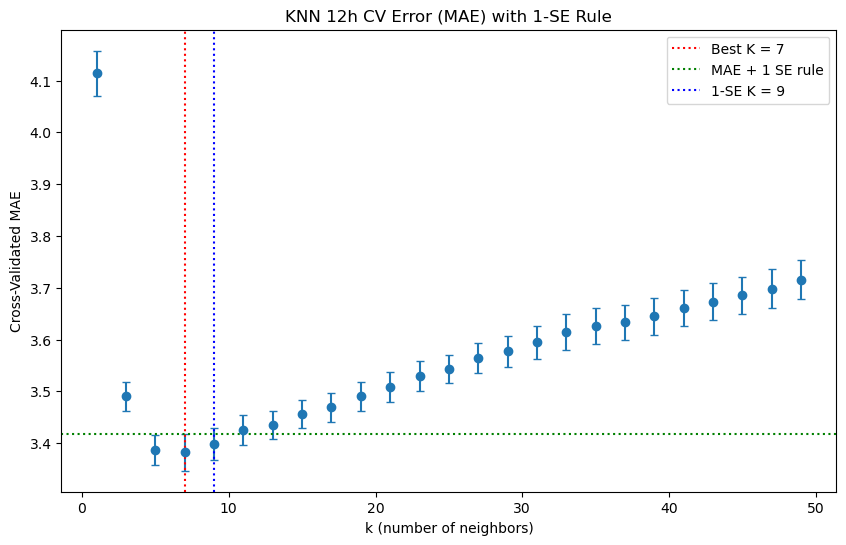

In [109]:
plt.figure(figsize=(10,6))

# Error bars for K values
plt.errorbar(x=k_grid_12h,y=test_MAEs_12h,yerr=se_test_MAEs_12h,fmt='o',capsize=3)

# Vertical line: best K (min MAE)
plt.axvline(best_k_12h, ls='dotted', color='red',label=f"Best K = {best_k_12h}")

# Horizontal line: MAE + 1 SE threshold
plt.axhline(test_MAEs_12h[index_best_12h] + se_test_MAEs_12h[index_best_12h], ls='dotted', color='green', label="MAE + 1 SE rule")

# Vertical line: K chosen by 1-SE rule
plt.axvline(one_se_rule_best_k_12h, ls='dotted', color='blue', label=f"1-SE K = {one_se_rule_best_k_12h}")

plt.title("KNN 12h CV Error (MAE) with 1-SE Rule")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross-Validated MAE")
plt.legend()
plt.show()



## 4.2 KNN 24 pred 

In [110]:
knn = KNeighborsRegressor()

param_grid = {"n_neighbors": np.arange(1, 50, 2)}

knn_cv_24h = GridSearchCV(estimator=knn,param_grid=param_grid, scoring="neg_mean_absolute_error",
    cv=KFold(n_splits=10, shuffle=True, random_state=1),n_jobs=-1)

knn_cv_24h.fit(X_train, y24_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='neg_mean_absolute_error')

#### 4.2.1 Find the best K 

In [111]:
# Extract CV results
resCV_24h = knn_cv_24h.cv_results_

# Convert negative MAE to positive MAE
test_MAEs_24h = -resCV_24h["mean_test_score"]

# Extract k grid
k_grid_24h = resCV_24h["param_n_neighbors"].data

# Index of best MAE
index_best_24h = np.argmin(test_MAEs_24h)

# Best k value
best_k_24h = k_grid_24h[index_best_24h]

print("Best K (24h):", best_k_24h)


Best K (24h): 5


#### 4.2.2 Best K with one-se rule 

In [112]:
# Standard error = std / sqrt(n_splits)
se_test_MAEs_24h = resCV_24h["std_test_score"] / np.sqrt(10)

# 1-SE rule (simple version)
one_se_rule_best_k_24h = np.max(
    k_grid_24h[
        test_MAEs_24h <= test_MAEs_24h[index_best_24h] + se_test_MAEs_24h[index_best_24h]
    ]
)

print("Best K (1-SE rule, 24h):", one_se_rule_best_k_24h)



Best K (1-SE rule, 24h): 9


#### 4.2.3 Train and Test MAE for 24H 

In [113]:
#Train and evaluate KNN with best K (24h)
knn_24h_best = KNeighborsRegressor(n_neighbors=best_k_24h)
knn_24h_best.fit(X_train, y24_train)

y24_train_pred_best_knn24 = knn_24h_best.predict(X_train)
y24_test_pred_best_knn24  = knn_24h_best.predict(X_test)

print("Train MAE 24h K =", best_k_24h, ":", mean_absolute_error(y24_train, y24_train_pred_best_knn24))
print("Test MAE 24h  K =", best_k_24h, ":", mean_absolute_error(y24_test,  y24_test_pred_best_knn24))

#Train and evaluate KNN with 1-SE rule K (24h)
knn_24h_1se = KNeighborsRegressor(n_neighbors=one_se_rule_best_k_24h)
knn_24h_1se.fit(X_train, y24_train)

y24_train_pred_1se_knn24 = knn_24h_1se.predict(X_train)
y24_test_pred_1se_knn24  = knn_24h_1se.predict(X_test)

print("Train MAE 24h K =", one_se_rule_best_k_24h, ":", mean_absolute_error(y24_train, y24_train_pred_1se_knn24))
print("Test MAE 24h  K =", one_se_rule_best_k_24h, ":", mean_absolute_error(y24_test,  y24_test_pred_1se_knn24))

Train MAE 24h K = 5 : 2.6370217062089853
Test MAE 24h  K = 5 : 3.202005383580081
Train MAE 24h K = 9 : 2.8931833903565356
Test MAE 24h  K = 9 : 3.205091969493046


## 4.3 KNN 48 pred 

In [114]:
knn = KNeighborsRegressor()

param_grid = {"n_neighbors": np.arange(10, 50, 1)}

knn_cv_48h = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="neg_mean_absolute_error", 
    cv=KFold(n_splits=10, shuffle=True, random_state=1), n_jobs=-1)

knn_cv_48h.fit(X_train, y48_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_absolute_error')

#### 4.3.1 Extract the best K from CV

In [115]:
# Extract CV results
resCV_48h = knn_cv_48h.cv_results_

# Convert negative MAE to positive MAE
test_MAEs_48h = -resCV_48h["mean_test_score"]

# Extract k grid
k_grid_48h = resCV_48h["param_n_neighbors"].data

# Index of best MAE
index_best_48h = np.argmin(test_MAEs_48h)

# Best k value
best_k_48h = k_grid_48h[index_best_48h]

print("Best K (48h):", best_k_48h)


Best K (48h): 10


#### 4.3.2 Best K using one-se rule 

In [116]:
# Best K with one–std rule (48h)

# Standard error = std / sqrt(n_splits)
se_test_MAEs_48h = resCV_48h["std_test_score"] / np.sqrt(10)

# 1–SE rule
one_se_rule_best_k_48h = np.max(
    k_grid_48h[
        test_MAEs_48h <= test_MAEs_48h[index_best_48h] + se_test_MAEs_48h[index_best_48h]
    ]
)

print("Best K (1-SE rule, 48h):", one_se_rule_best_k_48h)



Best K (1-SE rule, 48h): 18


### 4.3.3 Train and Test MAE for 48H 

In [117]:
#Train and evaluate KNN with best K (48h)
knn_48h_best = KNeighborsRegressor(n_neighbors=best_k_48h)
knn_48h_best.fit(X_train, y48_train)

y48_train_pred_best_knn48 = knn_48h_best.predict(X_train)
y48_test_pred_best_knn48  = knn_48h_best.predict(X_test)

print("Train MAE 48h K =", best_k_48h, ":", mean_absolute_error(y48_train, y48_train_pred_best_knn48))
print("Test MAE 48h  K =", best_k_48h, ":", mean_absolute_error(y48_test,  y48_test_pred_best_knn48))

#Train and evaluate KNN with 1-SE rule K (48h)
knn_48h_1se = KNeighborsRegressor(n_neighbors=one_se_rule_best_k_48h)
knn_48h_1se.fit(X_train, y48_train)

y48_train_pred_1se_knn48 = knn_48h_1se.predict(X_train)
y48_test_pred_1se_knn48  = knn_48h_1se.predict(X_test)

print("Train MAE 48h K =", one_se_rule_best_k_48h, ":", mean_absolute_error(y48_train, y48_train_pred_1se_knn48))
print("Test MAE 48h  K =", one_se_rule_best_k_48h, ":", mean_absolute_error(y48_test,  y48_test_pred_1se_knn48))


Train MAE 48h K = 10 : 3.3299697122665317
Test MAE 48h  K = 10 : 3.637987886944818
Train MAE 48h K = 18 : 3.551001177856301
Test MAE 48h  K = 18 : 3.6800209361447584


# 5 RIDGE MODEL 

## 5.1 Ridge for 12h Model 

#### 5.1.1 Perform CV to find best alpha and fit ridge model 

In [118]:
# Alpha grid (log-spaced)

ridge_reg_grid_12h = np.geomspace(1e-2, 1e6, num = 30)

# Param grid for GridSearchCV
ridge_12h_params = {"alpha": ridge_reg_grid_12h}

# 10-fold CV

folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Import Ridge and GridSearchCV

ridge_12h = Ridge()

# Ridge Regression with CV for alpha tuning

ridgeCV_12h = GridSearchCV(estimator=ridge_12h,param_grid=ridge_12h_params,scoring="neg_mean_absolute_error",
    cv=folds,n_jobs=-1)

#CV to find best alpha

ridgeCV_12h.fit(X_train, y12_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 1.88739182e-02, 3.56224789e-02, 6.72335754e-02,
       1.26896100e-01, 2.39502662e-01, 4.52035366e-01, 8.53167852e-01,
       1.61026203e+00, 3.03919538e+00, 5.73615251e+00, 1.08263673e+01,
       2.04335972e+01, 3.85662042e+01, 7.27895384e+01, 1.37382380e+02,
       2.59294380e+02, 4.89390092e+02, 9.23670857e+02, 1.74332882e+03,
       3.29034456e+03, 6.21016942e+03, 1.17210230e+04, 2.21221629e+04,
       4.17531894e+04, 7.88046282e+04, 1.48735211e+05, 2.80721620e+05,
       5.29831691e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

#### 5.1.2 Find best alpha parameter and alpha with one se rule

In [119]:
# Choose best model that minimizes cv_err

# Extract mean test scores and standard errors
mean_scores_12h = -ridgeCV_12h.cv_results_["mean_test_score"]
se_scores_12h = ridgeCV_12h.cv_results_["std_test_score"] / np.sqrt(ridgeCV_12h.n_splits_)

#Extract alphas
alphas_12h = ridgeCV_12h.cv_results_["param_alpha"].data

# Identify best alpha (minimum mean score)
best_index_12h = np.argmin(mean_scores_12h)
min_alpha_ridge_12h = alphas_12h[best_index_12h]

threshold_ridge_12h = mean_scores_12h[best_index_12h] + se_scores_12h[best_index_12h]
one_se_rule_alpha_ridge_12h = np.max(alphas_12h[mean_scores_12h <= threshold_ridge_12h])

print("Minimum alpha:", min_alpha_ridge_12h)
print("1-SD alpha:", one_se_rule_alpha_ridge_12h)

Minimum alpha: 0.01
1-SD alpha: 72.78953843983146


#### 5.1.3 Plot CV results (visual observation)

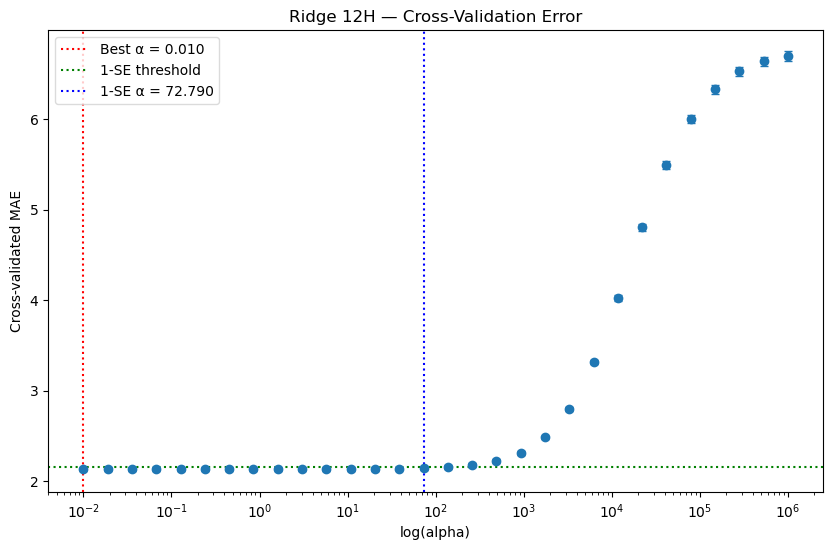

Exception ignored in: <function ResourceTracker.__del__ at 0x1077edbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1071a5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104f25bc0>
Traceback (most recent call last

In [ ]:
# Ridge 12H CV plot

plt.figure(figsize=(10,6))

# Error bars
plt.errorbar(x = ridge_reg_grid_12h,y = mean_scores_12h,
    yerr = se_scores_12h,fmt = 'o',capsize = 3)

# Best alpha
plt.axvline(min_alpha_ridge_12h,ls='dotted',color='red',label=f"Best α = {min_alpha_ridge_12h:.3f}")

# 1-SE threshold (no “MAE” text)
plt.axhline(threshold_ridge_12h,ls='dotted',color='green',label="1-SE threshold")

# 1-SE alpha
plt.axvline(one_se_rule_alpha_ridge_12h,ls='dotted',color='blue',label=f"1-SE α = {one_se_rule_alpha_ridge_12h:.3f}")

plt.xscale("log")
plt.xlabel("log(alpha)")
plt.ylabel("Cross-validated MAE")             
plt.title("Ridge 12H — Cross-Validation Error")  

plt.legend(loc="upper left",frameon=True,facecolor="white",edgecolor="lightgrey")

plt.show()

#### 5.1.4 Train and Test MAE 12H

In [64]:
# Train and evaluate Ridge with minimum alpha (12h)
ridge_12h_best = Ridge(alpha=min_alpha_ridge_12h)
ridge_12h_best.fit(X_train, y12_train)

y12_train_pred_best_ridge12 = ridge_12h_best.predict(X_train)
y12_test_pred_best_ridge12  = ridge_12h_best.predict(X_test)

print("Train MAE 12h (α =", min_alpha_ridge_12h, "):", 
      mean_absolute_error(y12_train, y12_train_pred_best_ridge12))
print("Test MAE 12h  (α =", min_alpha_ridge_12h, "):",
      mean_absolute_error(y12_test,  y12_test_pred_best_ridge12))


# Train and evaluate Ridge with 1-SD alpha (12h)
ridge_12h_1se_ridge12 = Ridge(alpha=one_se_rule_alpha_ridge_12h)
ridge_12h_1se_ridge12.fit(X_train, y12_train)

y12_train_pred_1se_ridge12 = ridge_12h_1se_ridge12.predict(X_train)
y12_test_pred_1se_ridge12  = ridge_12h_1se_ridge12.predict(X_test)

print("Train MAE 12h (α =", one_se_rule_alpha_ridge_12h, "):",
      mean_absolute_error(y12_train, y12_train_pred_1se_ridge12))
print("Test MAE 12h  (α =", one_se_rule_alpha_ridge_12h, "):",
      mean_absolute_error(y12_test,  y12_test_pred_1se_ridge12))

Train MAE 12h (α = 0.01 ): 2.1100305977351526
Test MAE 12h  (α = 0.01 ): 2.1039824258975397
Train MAE 12h (α = 72.78953843983146 ): 2.1261584217658216
Test MAE 12h  (α = 72.78953843983146 ): 2.103989997460156


## 5.2 Ridge for 24H Model

#### 5.2.1 Perform CV to find best alpha and fit ridge model 

In [65]:
#Define alpha grid (log–spaced)
ridge_reg_grid = np.geomspace(1e-2, 1e6, num=30)

# Define param grid for GridSearchCV
ridge_24h_params = {"alpha": ridge_reg_grid}

#Prepare 10-fold Cross Validation
folds = KFold(n_splits=10, shuffle=True, random_state=1)

#Ridge model
ridge_24h = Ridge()

#Set up Ridge regression model with GridSearchCV
ridgeCV_24h = GridSearchCV(estimator=ridge_24h,param_grid=ridge_24h_params,
    scoring="neg_mean_absolute_error",cv=folds,n_jobs=-1)

#Fit CV to find best alpha
ridgeCV_24h.fit(X_train, y24_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 1.88739182e-02, 3.56224789e-02, 6.72335754e-02,
       1.26896100e-01, 2.39502662e-01, 4.52035366e-01, 8.53167852e-01,
       1.61026203e+00, 3.03919538e+00, 5.73615251e+00, 1.08263673e+01,
       2.04335972e+01, 3.85662042e+01, 7.27895384e+01, 1.37382380e+02,
       2.59294380e+02, 4.89390092e+02, 9.23670857e+02, 1.74332882e+03,
       3.29034456e+03, 6.21016942e+03, 1.17210230e+04, 2.21221629e+04,
       4.17531894e+04, 7.88046282e+04, 1.48735211e+05, 2.80721620e+05,
       5.29831691e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

#### 5.2.2 Find best alpha parameter and alpha with one se rule 

In [66]:
# Choose best model that minimizes cv_err

# Extract mean test scores and standard errors
mean_scores_24h = -ridgeCV_24h.cv_results_["mean_test_score"]
se_scores_24h   = ridgeCV_24h.cv_results_["std_test_score"] / np.sqrt(ridgeCV_24h.n_splits_)

# Extract alphas
alphas_24h = ridgeCV_24h.cv_results_["param_alpha"].data

# Identify best alpha 
best_index_24h = np.argmin(mean_scores_24h)
min_alpha_ridge_24h = alphas_24h[best_index_24h]

threshold_ridge_24h = mean_scores_24h[best_index_24h] + se_scores_24h[best_index_24h]
one_se_rule_alpha_ridge_24h = np.max(alphas_24h[mean_scores_24h <= threshold_ridge_24h])

print("Minimum alpha:", min_alpha_ridge_24h)
print("1-SD alpha:", one_se_rule_alpha_ridge_24h)


Minimum alpha: 1.6102620275609392
1-SD alpha: 137.3823795883264


#### 5.2.3 Train and Test MAE for 24H

In [67]:
# Train and evaluate Ridge with minimum alpha (24h)
ridge_24h_best = Ridge(alpha=min_alpha_ridge_24h)
ridge_24h_best.fit(X_train, y24_train)

# Predictions
y24_train_pred_best_ridge24 = ridge_24h_best.predict(X_train)
y24_test_pred_best_ridge24  = ridge_24h_best.predict(X_test)

# Print MAE results
print("Train MAE 24h (α =", min_alpha_ridge_24h, "):",
      mean_absolute_error(y24_train, y24_train_pred_best_ridge24))
print("Test MAE 24h  (α =", min_alpha_ridge_24h, "):",
      mean_absolute_error(y24_test,  y24_test_pred_best_ridge24))


# Train and evaluate Ridge with 1-SD alpha (24h)
ridge_24h_1se_ridge24 = Ridge(alpha=one_se_rule_alpha_ridge_24h)
ridge_24h_1se_ridge24.fit(X_train, y24_train)

# Predictions
y24_train_pred_1se_ridge24 = ridge_24h_1se_ridge24.predict(X_train)
y24_test_pred_1se_ridge24  = ridge_24h_1se_ridge24.predict(X_test)

# Print MAE results
print("Train MAE 24h (α =", one_se_rule_alpha_ridge_24h, "):",
      mean_absolute_error(y24_train, y24_train_pred_1se_ridge24))
print("Test MAE 24h  (α =", one_se_rule_alpha_ridge_24h, "):",
      mean_absolute_error(y24_test,  y24_test_pred_1se_ridge24))

Train MAE 24h (α = 1.6102620275609392 ): 1.9949974949970382
Test MAE 24h  (α = 1.6102620275609392 ): 2.0944783947978265
Train MAE 24h (α = 137.3823795883264 ): 2.02055628555251
Test MAE 24h  (α = 137.3823795883264 ): 2.1089748658529595


## 5.3 Ridge for 48H Model 

#### 5.3.1 Perform CV to find best alpha and fit ridge model 

In [68]:
# Define alpha grid
ridge_reg_grid = np.geomspace(1e-2, 1e6, num=30)

# Parameter grid for GridSearchCV
ridge_48h_params = {"alpha": ridge_reg_grid}

# 10-fold CV
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Ridge model
ridge_48h = Ridge()

# GridSearchCV setup
ridgeCV_48h = GridSearchCV(estimator=ridge_48h,param_grid=ridge_48h_params,
    scoring="neg_mean_absolute_error",cv=folds,n_jobs=-1)

# Fit CV for 48h target
ridgeCV_48h.fit(X_train, y48_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 1.88739182e-02, 3.56224789e-02, 6.72335754e-02,
       1.26896100e-01, 2.39502662e-01, 4.52035366e-01, 8.53167852e-01,
       1.61026203e+00, 3.03919538e+00, 5.73615251e+00, 1.08263673e+01,
       2.04335972e+01, 3.85662042e+01, 7.27895384e+01, 1.37382380e+02,
       2.59294380e+02, 4.89390092e+02, 9.23670857e+02, 1.74332882e+03,
       3.29034456e+03, 6.21016942e+03, 1.17210230e+04, 2.21221629e+04,
       4.17531894e+04, 7.88046282e+04, 1.48735211e+05, 2.80721620e+05,
       5.29831691e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

#### 5.3.2 Find best alpha parameter and alpha with one se rule 

In [69]:
# Choose best model that minimizes cv_err

# Extract mean test scores and standard errors
mean_scores_48h = -ridgeCV_48h.cv_results_["mean_test_score"]
se_scores_48h   = ridgeCV_48h.cv_results_["std_test_score"] / np.sqrt(ridgeCV_48h.n_splits_)

# Extract alphas
alphas_48h = ridgeCV_48h.cv_results_["param_alpha"].data

# Identify best alpha (minimum mean score)
best_index_48h = np.argmin(mean_scores_48h)
min_alpha_ridge_48h = alphas_48h[best_index_48h]

# Calculate 1-SE rule alpha
threshold_ridge_48h = mean_scores_48h[best_index_48h] + se_scores_48h[best_index_48h]
one_se_rule_alpha_ridge_48h = np.max(alphas_48h[mean_scores_48h <= threshold_ridge_48h])

# Print results
print("Minimum alpha:", min_alpha_ridge_48h)
print("1-SD alpha:", one_se_rule_alpha_ridge_48h)


Minimum alpha: 0.12689610031679222
1-SD alpha: 137.3823795883264


#### 5.2.3 Train and Test MAE for 48H

In [70]:
# Train and evaluate Ridge with minimum alpha (48h)
ridge_48h_best = Ridge(alpha=min_alpha_ridge_48h)
ridge_48h_best.fit(X_train, y48_train)

# Predictions
y48_train_pred_best_ridge48 = ridge_48h_best.predict(X_train)
y48_test_pred_best_ridge48  = ridge_48h_best.predict(X_test)

# Print MAE results
print("Train MAE 48h (α =", min_alpha_ridge_48h, "):",
      mean_absolute_error(y48_train, y48_train_pred_best_ridge48))
print("Test MAE 48h  (α =", min_alpha_ridge_48h, "):",
      mean_absolute_error(y48_test,  y48_test_pred_best_ridge48))

# Train and evaluate Ridge with 1–SD alpha (48h)
ridge_48h_1se = Ridge(alpha=one_se_rule_alpha_ridge_48h)
ridge_48h_1se.fit(X_train, y48_train)

# Predictions
y48_train_pred_1se_ridge48 = ridge_48h_1se.predict(X_train)
y48_test_pred_1se_ridge48  = ridge_48h_1se.predict(X_test)

# Print MAE results
print("Train MAE 48h (α =", one_se_rule_alpha_ridge_48h, "):",
      mean_absolute_error(y48_train, y48_train_pred_1se_ridge48))
print("Test MAE 48h  (α =", one_se_rule_alpha_ridge_48h, "):",
      mean_absolute_error(y48_test,  y48_test_pred_1se_ridge48))

Train MAE 48h (α = 0.12689610031679222 ): 2.5996800340963095
Test MAE 48h  (α = 0.12689610031679222 ): 2.678910197243366
Train MAE 48h (α = 137.3823795883264 ): 2.6191025836685276
Test MAE 48h  (α = 137.3823795883264 ): 2.7094203290548426


# 6 LASSO MODELS 

## 6.1 LASSO FOR 12H 

#### 6.1.1 CV on lasso 12H model to find the best alpha

In [71]:
# Define alpha grid for Lasso
lasso_grid = np.geomspace(1e-8, 1e2, num=60)

# Parameter grid for GridSearchCV
params_lasso_12h = {"alpha": lasso_grid}

# 10-fold CV
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Lasso model
lasso_12h = Lasso()

# Lasso Regression with CV for alpha tuning
lassoCV_12h = GridSearchCV(estimator=lasso_12h,param_grid=params_lasso_12h,
    scoring="neg_mean_absolute_error",cv=folds,n_jobs=-1)

#§Fit CV to find best alpha
lassoCV_12h.fit(X_train, y12_train)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+04, tolerance: 3.560e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e+04, tolerance: 3.599e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+04, toler

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.47737765e-08, 2.18264473e-08, 3.22459055e-08,
       4.76393801e-08, 7.03813555e-08, 1.03979842e-07, 1.53617495e-07,
       2.26951054e-07, 3.35292415e-07, 4.95353521e-07, 7.31824222e-07,
       1.08118075e-06, 1.59731228e-06, 2.35983347e-06, 3.4863...
       1.26384820e-02, 1.86718109e-02, 2.75853162e-02, 4.07539297e-02,
       6.02089449e-02, 8.89513497e-02, 1.31414736e-01, 1.94149195e-01,
       2.86831681e-01, 4.23758716e-01, 6.26051657e-01, 9.24914728e-01,
       1.36644835e+00, 2.01876025e+00, 2.98247129e+00, 4.40623643e+00,
       6.50967523e+00, 9.61724871e+00, 1.42083083e+01, 2.09910372e+01,
       3.10116893e+01, 4.58159767e+01, 6.76875001e+01, 1.00000000e+02])},
             scoring='neg_mean_absolute_error')

#### 6.1.2 CV results best alpha and alpha using one se rule

In [72]:
# Choose best model that minimizes the cv_err

# Extract mean test scores and standard errors
mean_scores = -lassoCV_12h.cv_results_["mean_test_score"]
se_scores   =  lassoCV_12h.cv_results_["std_test_score"] / np.sqrt(lassoCV_12h.n_splits_)

# Extract alphas
alphas = lassoCV_12h.cv_results_["param_alpha"].data

# Identify best alpha (minimum mean score)
best_index       = np.argmin(mean_scores)
min_alpha_lasso  = alphas[best_index]

# Calculate 1-SE rule alpha
threshold_lasso = mean_scores[best_index] + se_scores[best_index]
one_se_rule_alpha_lasso = np.max(alphas[mean_scores <= threshold_lasso])

# Print results
print("Minimum alpha:", min_alpha_lasso)
print("1-SD alpha:", one_se_rule_alpha_lasso)


Minimum alpha: 1e-08
1-SD alpha: 0.027585316176291813


#### 6.1.3 CV results plotted 

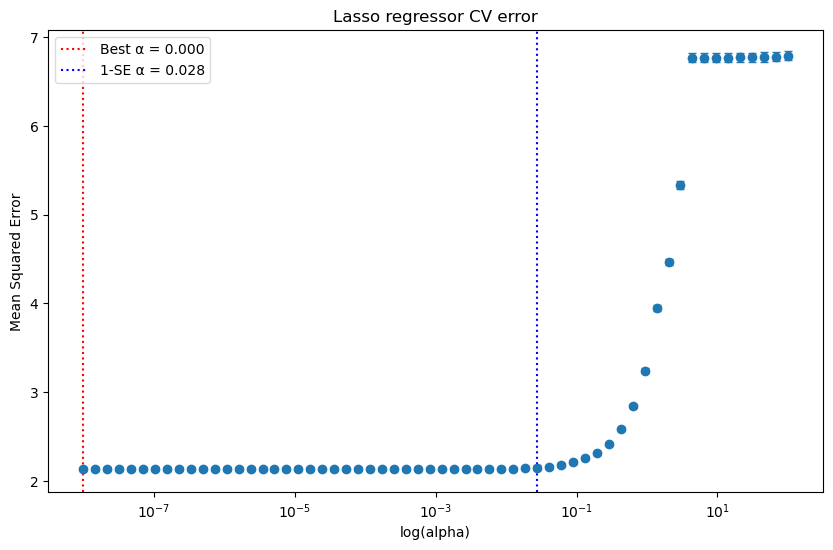

In [73]:
plt.figure(figsize=(10,6))

# Error bars
plt.errorbar(x=alphas,y=mean_scores,yerr=se_scores,
    fmt='o',capsize=3)

# Vertical lines (colors kept)
plt.axvline(min_alpha_lasso, ls='dotted', color='red')
plt.axvline(one_se_rule_alpha_lasso, ls='dotted', color='blue')

# Title and labels
plt.title("Lasso regressor CV error")
plt.xlabel("log(alpha)")
plt.ylabel("Mean Squared Error")

# Log-scale x-axis
plt.xscale("log")

# Legend 
plt.legend(
    [f"Best α = {min_alpha_lasso:.3f}",f"1-SE α = {one_se_rule_alpha_lasso:.3f}"],
    loc="upper left",
    frameon=True,
    facecolor="white",
    edgecolor="lightgrey")

plt.show()


In [74]:
# Train and evaluate Lasso with minimum alpha (12h)
lasso_12h_best = Lasso(alpha=min_alpha_lasso, max_iter=10000)
lasso_12h_best.fit(X_train, y12_train)

# Predictions
y12_train_pred_best_lasso12 = lasso_12h_best.predict(X_train)
y12_test_pred_best_lasso12  = lasso_12h_best.predict(X_test)

# Print MAE results
print("Train MAE 12h (α =", min_alpha_lasso, "):",
      mean_absolute_error(y12_train, y12_train_pred_best_lasso12))
print("Test MAE 12h  (α =", min_alpha_lasso, "):",
      mean_absolute_error(y12_test,  y12_test_pred_best_lasso12))

# Train and evaluate Lasso with 1-SE alpha (12h)
lasso_12h_1se = Lasso(alpha=one_se_rule_alpha_lasso, max_iter=10000)
lasso_12h_1se.fit(X_train, y12_train)

# Predictions
y12_train_pred_1se_lasso12 = lasso_12h_1se.predict(X_train)
y12_test_pred_1se_lasso12  = lasso_12h_1se.predict(X_test)

# Print MAE results
print("Train MAE 12h (α =", one_se_rule_alpha_lasso, "):",
      mean_absolute_error(y12_train, y12_train_pred_1se_lasso12))
print("Test MAE 12h  (α =", one_se_rule_alpha_lasso, "):",
      mean_absolute_error(y12_test,  y12_test_pred_1se_lasso12))

Train MAE 12h (α = 1e-08 ): 2.110083778923937
Test MAE 12h  (α = 1e-08 ): 2.1038791084767814
Train MAE 12h (α = 0.027585316176291813 ): 2.1390917904009927
Test MAE 12h  (α = 0.027585316176291813 ): 2.1099881688679596


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.086e+04, tolerance: 3.995e+01
  model = cd_fast.enet_coordinate_descent(


## 6.2 Lasso for 24H 

#### 6.2.1 CV on lasso 24H model to find the best alpha

In [75]:
# Define alpha grid for Lasso (24h)
lasso_grid = np.geomspace(1e-4, 1e6, num=40)

# Parameter grid for GridSearchCV
params_lasso_24h = {"alpha": lasso_grid}

# 10-fold CV
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Lasso model
lasso_24h = Lasso()

# Lasso Regression with CV for alpha tuning
lassoCV_24h = GridSearchCV(estimator=lasso_24h,param_grid=params_lasso_24h,
    scoring="neg_mean_absolute_error",cv=folds,n_jobs=-1)

# Fit CV to find best alpha
lassoCV_24h.fit(X_train, y24_train)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+04, tolerance: 3.468e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.742e+04, tolerance: 3.466e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e+04, toler

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.80472177e-04, 3.25702066e-04, 5.87801607e-04,
       1.06081836e-03, 1.91448198e-03, 3.45510729e-03, 6.23550734e-03,
       1.12533558e-02, 2.03091762e-02, 3.66524124e-02, 6.61474064e-02,
       1.19377664e-01, 2.15443469e-01, 3.88815518e-01, 7.0170...
       1.26638017e+00, 2.28546386e+00, 4.12462638e+00, 7.44380301e+00,
       1.34339933e+01, 2.42446202e+01, 4.37547938e+01, 7.89652287e+01,
       1.42510267e+02, 2.57191381e+02, 4.64158883e+02, 8.37677640e+02,
       1.51177507e+03, 2.72833338e+03, 4.92388263e+03, 8.88623816e+03,
       1.60371874e+04, 2.89426612e+04, 5.22334507e+04, 9.42668455e+04,
       1.70125428e+05, 3.07029063e+05, 5.54102033e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

#### 6.2.2 CV results best alpha and one standard error alpha

In [76]:
# Choose best model that minimizes the cv_err

# Extract mean test scores and standard errors
mean_scores_24h = -lassoCV_24h.cv_results_["mean_test_score"]
se_scores_24h   =  lassoCV_24h.cv_results_["std_test_score"] / np.sqrt(lassoCV_24h.n_splits_)

# Extract alphas
alphas_24h = lassoCV_24h.cv_results_["param_alpha"].data

# Identify best alpha (minimum mean score)
best_index_24h      = np.argmin(mean_scores_24h)
min_alpha_lasso_24h = alphas_24h[best_index_24h]

threshold_lasso_24h          = mean_scores_24h[best_index_24h] + se_scores_24h[best_index_24h]
one_se_rule_alpha_lasso_24h  = np.max(alphas_24h[mean_scores_24h <= threshold_lasso_24h])

# Print results
print("Minimum alpha:", min_alpha_lasso_24h)
print("1-SD alpha:",    one_se_rule_alpha_lasso_24h)


Minimum alpha: 0.0010608183551394483
1-SD alpha: 0.020309176209047347


#### 6.2.3 Train and Test MAE for 24H 

In [77]:
# Train and evaluate Lasso with minimum alpha (24h) 
lasso_24h_best = Lasso(alpha=min_alpha_lasso_24h, max_iter=10000)
lasso_24h_best.fit(X_train, y24_train)

# Predictions
y24_train_pred_best_lasso24 = lasso_24h_best.predict(X_train)
y24_test_pred_best_lasso24  = lasso_24h_best.predict(X_test)

# Print MAE results
print("Train MAE 24h (α =", min_alpha_lasso_24h, "):",
      mean_absolute_error(y24_train, y24_train_pred_best_lasso24))
print("Test MAE 24h  (α =", min_alpha_lasso_24h, "):",
      mean_absolute_error(y24_test,  y24_test_pred_best_lasso24))


#Train and evaluate Lasso with 1-SE alpha (24h)
lasso_24h_1se = Lasso(alpha=one_se_rule_alpha_lasso_24h, max_iter=10000)
lasso_24h_1se.fit(X_train, y24_train)

# Predictions
y24_train_pred_1se_lasso24 = lasso_24h_1se.predict(X_train)
y24_test_pred_1se_lasso24  = lasso_24h_1se.predict(X_test)

# Print MAE results
print("Train MAE 24h (α =", one_se_rule_alpha_lasso_24h, "):",
      mean_absolute_error(y24_train, y24_train_pred_1se_lasso24))
print("Test MAE 24h  (α =", one_se_rule_alpha_lasso_24h, "):",
      mean_absolute_error(y24_test,  y24_test_pred_1se_lasso24))

Train MAE 24h (α = 0.0010608183551394483 ): 1.9950577532445029
Test MAE 24h  (α = 0.0010608183551394483 ): 2.0926517331498418
Train MAE 24h (α = 0.020309176209047347 ): 2.0219412281906
Test MAE 24h  (α = 0.020309176209047347 ): 2.0989352077590393


## 6.3 Lasso for 48H

#### 6.3.1 CV on Lasso to find the best alpha for 48 hours

In [78]:
# Define alpha grid
lasso_grid = np.geomspace(1e-4, 1e6, num=40)

# Define param grid for GridSearchCV
params_lasso_48h = {"alpha": lasso_grid}

# Prepare 10-fold CV
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Lasso model
lasso_48h = Lasso()

# Set up Lasso regression model with GridSearchCV
lassoCV_48h = GridSearchCV(estimator=lasso_48h,param_grid=params_lasso_48h,
    scoring="neg_mean_absolute_error",cv=folds,n_jobs=-1)

# Fit CV to find best alpha
lassoCV_48h.fit(X_train, y48_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.892e+04, tolerance: 3.469e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e+04, tolerance: 3.426e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.877e+04, toler

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.80472177e-04, 3.25702066e-04, 5.87801607e-04,
       1.06081836e-03, 1.91448198e-03, 3.45510729e-03, 6.23550734e-03,
       1.12533558e-02, 2.03091762e-02, 3.66524124e-02, 6.61474064e-02,
       1.19377664e-01, 2.15443469e-01, 3.88815518e-01, 7.0170...
       1.26638017e+00, 2.28546386e+00, 4.12462638e+00, 7.44380301e+00,
       1.34339933e+01, 2.42446202e+01, 4.37547938e+01, 7.89652287e+01,
       1.42510267e+02, 2.57191381e+02, 4.64158883e+02, 8.37677640e+02,
       1.51177507e+03, 2.72833338e+03, 4.92388263e+03, 8.88623816e+03,
       1.60371874e+04, 2.89426612e+04, 5.22334507e+04, 9.42668455e+04,
       1.70125428e+05, 3.07029063e+05, 5.54102033e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

#### 6.3.2 CV results best alpha and one standard error alpha 

In [79]:
# Choose best model that minimizes the cv_err

# Extract mean test scores and standard errors
mean_scores_48h = -lassoCV_48h.cv_results_["mean_test_score"]
se_scores_48h   =  lassoCV_48h.cv_results_["std_test_score"] / np.sqrt(lassoCV_48h.n_splits_)

# Extract alphas
alphas_48h = lassoCV_48h.cv_results_["param_alpha"].data

# Identify best alpha (minimum mean score)
best_index_48h      = np.argmin(mean_scores_48h)
min_alpha_lasso_48h = alphas_48h[best_index_48h]

# Calculate 1-SE rule alpha
threshold_lasso_48h          = mean_scores_48h[best_index_48h] + se_scores_48h[best_index_48h]
one_se_rule_alpha_lasso_48h  = np.max(alphas_48h[mean_scores_48h <= threshold_lasso_48h])

# Print results
print("Minimum alpha:", min_alpha_lasso_48h)
print("1-SD alpha:",    one_se_rule_alpha_lasso_48h)


Minimum alpha: 0.0001
1-SD alpha: 0.03665241237079626


#### 6.3.3 Train and Test MAE for 48H

In [80]:
#Train and evaluate Lasso with minimum alpha (48h)
lasso_48h_best = Lasso(alpha=min_alpha_lasso_48h, max_iter=10000)
lasso_48h_best.fit(X_train, y48_train)

y48_train_pred_best_lasso48 = lasso_48h_best.predict(X_train)
y48_test_pred_best_lasso48  = lasso_48h_best.predict(X_test)

print("Train MAE 48h (α =", min_alpha_lasso_48h, "):",
      mean_absolute_error(y48_train, y48_train_pred_best_lasso48))
print("Test MAE 48h  (α =", min_alpha_lasso_48h, "):",
      mean_absolute_error(y48_test,  y48_test_pred_best_lasso48))


#Train and evaluate Lasso with 1-SE alpha (48h)
lasso_48h_1se = Lasso(alpha=one_se_rule_alpha_lasso_48h, max_iter=10000)
lasso_48h_1se.fit(X_train, y48_train)

y48_train_pred_1se_lasso48 = lasso_48h_1se.predict(X_train)
y48_test_pred_1se_lasso48  = lasso_48h_1se.predict(X_test)

print("Train MAE 48h (α =", one_se_rule_alpha_lasso_48h, "):",
      mean_absolute_error(y48_train, y48_train_pred_1se_lasso48))
print("Test MAE 48h  (α =", one_se_rule_alpha_lasso_48h, "):",
      mean_absolute_error(y48_test,  y48_test_pred_1se_lasso48))

Train MAE 48h (α = 0.0001 ): 2.5996632386230716
Test MAE 48h  (α = 0.0001 ): 2.678874314942601
Train MAE 48h (α = 0.03665241237079626 ): 2.625218457183473
Test MAE 48h  (α = 0.03665241237079626 ): 2.70260292113141


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+04, tolerance: 3.834e+01
  model = cd_fast.enet_coordinate_descent(


# 7 SUMMARY MAE TEST/TRAIN MODELS

In [81]:
# Compile MAE results into a dictionary

mae_data_ml = {
    "Linear": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_linear12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_linear24), 
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_linear48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_linear12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_linear24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_linear48),
    },

    "KNN Best K": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_best_knn12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_best_knn24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_best_knn48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_best_knn12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_best_knn24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_best_knn48),
    },

    "KNN 1SE": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_1se_knn12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_1se_knn24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_1se_knn48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_1se_knn12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_1se_knn24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_1se_knn48),
    },

    "Ridge Best α": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_best_ridge12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_best_ridge24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_best_ridge48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_best_ridge12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_best_ridge24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_best_ridge48),
    },

    "Ridge 1SE": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_1se_ridge12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_1se_ridge24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_1se_ridge48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_1se_ridge12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_1se_ridge24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_1se_ridge48),
    },

    "Lasso Best α": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_best_lasso12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_best_lasso24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_best_lasso48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_best_lasso12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_best_lasso24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_best_lasso48),
    },

    "Lasso 1SE": {
        "Train 12h": mean_absolute_error(y12_train, y12_train_pred_1se_lasso12),
        "Train 24h": mean_absolute_error(y24_train, y24_train_pred_1se_lasso24),
        "Train 48h": mean_absolute_error(y48_train, y48_train_pred_1se_lasso48),
        "Test 12h":  mean_absolute_error(y12_test,  y12_test_pred_1se_lasso12),
        "Test 24h":  mean_absolute_error(y24_test,  y24_test_pred_1se_lasso24),
        "Test 48h":  mean_absolute_error(y48_test,  y48_test_pred_1se_lasso48),
    },
}

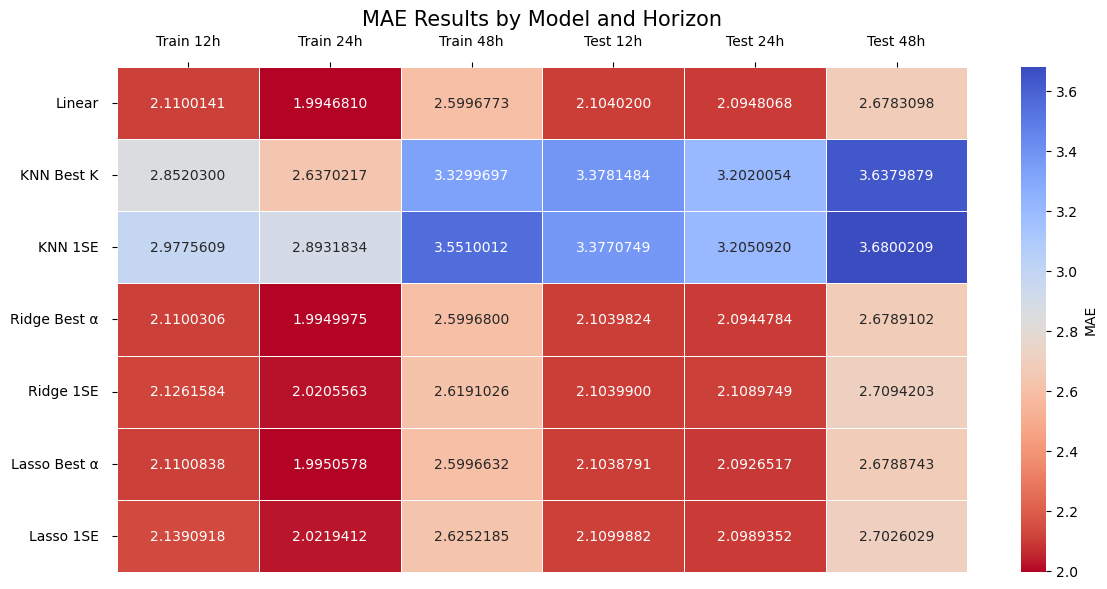

In [82]:
# Create DataFrame from MAE results
df = pd.DataFrame(mae_data_ml).T

plt.figure(figsize=(12, 6))
cmap = sns.color_palette("coolwarm_r", as_cmap=True)

ax = sns.heatmap(
    df,
    annot=True,
    fmt=".7f",
    cmap=cmap,
    linewidths=0.5,
    cbar=True,
    cbar_kws={"label": "MAE"},
)

ax.xaxis.tick_top()                        
ax.xaxis.set_label_position('top')

ax.tick_params(top=True, bottom=False, pad=10) 

plt.title("MAE Results by Model and Horizon", fontsize=15, pad=30)

plt.tight_layout()
plt.show()


# 8 RANDOM FOREST MODEL 

## 8.1 Prepare the data for RF models (it will be the same for Boosting)

In [ ]:
# Copy dataset
weather_nonlinear = pd.read_csv( "INSERT TRAIN FILE PATH HERE")

# Convert 'season' to categorical type
weather_nonlinear = weather_nonlinear.astype({'season': 'category'})

# Cyclic encoding
max_hour = 24
weather_nonlinear["hour_sin"] = np.sin(2 * np.pi * weather_nonlinear["hour"] / max_hour)
weather_nonlinear["hour_cos"] = np.cos(2 * np.pi * weather_nonlinear["hour"] / max_hour)

# Create seasonal hourly mean and std for each season-hour combination
weather_nonlinear["mean_season_hour"] = (
    weather_nonlinear.groupby(["season", "hour"])["tre200h0"].transform("mean")
)

weather_nonlinear["std_season_hour"] = (
    weather_nonlinear.groupby(["season", "hour"])["tre200h0"].transform("std")
)

# Create temperature anomaly feature which is the deviation from seasonal hourly mean
weather_nonlinear["temp_anomaly"] = (
    weather_nonlinear["tre200h0"] - weather_nonlinear["mean_season_hour"]
)

# Drop hour
weather_nonlinear = weather_nonlinear.drop(columns=["hour"])

# Drop rows with NaN values
weather_nonlinear = weather_nonlinear.dropna().reset_index(drop=True)

feature_cols_nonlinear = [
    col for col in weather_nonlinear.columns if "target" not in col
]

X_non_linear = pd.get_dummies(
    weather_nonlinear[feature_cols_nonlinear],
    drop_first=True
)

# Targets
y12 = weather_nonlinear["target_tre200h0_plus12h"]
y24 = weather_nonlinear["target_tre200h0_plus24h"]
y48 = weather_nonlinear["target_tre200h0_plus48h"]

# Train-test split
X_train_nonlinear, X_test_nonlinear, y12_train_nonlinear, y12_test_nonlinear, y24_train_nonlinear, y24_test_nonlinear, y48_train_nonlinear, y48_test_nonlinear = train_test_split(
    X_non_linear,
    y12, y24, y48,
    test_size=0.2,
    random_state=1
)




/var/folders/nr/bgsshsks2k3ct2nhfbl7tldr0000gn/T/ipykernel_61906/10608130.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_nonlinear.groupby(["season", "hour"])["tre200h0"].transform("mean")
/var/folders/nr/bgsshsks2k3ct2nhfbl7tldr0000gn/T/ipykernel_61906/10608130.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_nonlinear.groupby(["season", "hour"])["tre200h0"].transform("std")


## 8.2 RF for 12H 

#### 8.2.1 Apply Grid Search to find the best hyperparams for our RF for 12H

In [84]:
# Hyperparameter grid for Random Forest Regressor
p = X_train_nonlinear.shape[1]

hyperparam_grid = {"n_estimators": [300, 500, 800],"max_depth": [10, 20, 30, None],"min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],"max_features": [int(p**0.5), int(p/3), int(p/2)]}

# Initialize Random Forest Regressor
rfr_12 = RandomForestRegressor(oob_score=True,warm_start=False,random_state=1,n_jobs=-1)

best_score = 0.0
best_params = None

# Grid search
for g in ParameterGrid(hyperparam_grid):

    # update hyperparameters
    rfr_12.set_params(**g)

    # fit model on training data
    rfr_12.fit(X_train_nonlinear, y12_train_nonlinear)

    # check OOB score
    if rfr_12.oob_score_ > best_score:
        best_score = rfr_12.oob_score_
        best_params = g

# Print results
print("Best parameters:", best_params)


Exception ignored in: <function ResourceTracker.__del__ at 0x1076d5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x109649bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106c45bc0>
Traceback (most recent call last

Best parameters: {'max_depth': 30, 'max_features': 47, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


#### 8.2.2 Fit RF 12H on best parameters and calculate Test and Train MAE 

In [85]:
p = X_train_nonlinear.shape[1]

best_params_12h = {
    'n_estimators': 800,
    'max_depth': 30,
    'max_features': 47,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
}

# Create RF model with best parameters
best_rfr_12h = RandomForestRegressor(
    **best_params_12h,
    random_state=1,
    n_jobs=-1
)

# Fit on training set
best_rfr_12h.fit(X_train_nonlinear, y12_train_nonlinear)

# Predictions
y12_train_pred = best_rfr_12h.predict(X_train_nonlinear)
y12_test_pred  = best_rfr_12h.predict(X_test_nonlinear)

# Calculate MAE
train_mae_rf12h = mean_absolute_error(y12_train_nonlinear, y12_train_pred)
test_mae_rf12h  = mean_absolute_error(y12_test_nonlinear, y12_test_pred)

print(f"Train MAE (12h): {train_mae_rf12h:.5f}")
print(f"Test  MAE (12h): {test_mae_rf12h:.5f}")


Train MAE (12h): 0.61293
Test  MAE (12h): 1.62787


## 8.3 RF for 24H

#### 8.3.1 Apply Grid Search to find the best hyperparameters for our RF for 24H

In [86]:
p = X_train_nonlinear.shape[1]

hyperparam_grid = {
    "n_estimators": [300, 500, 800],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [int(p**0.5), int(p/3), int(p/2)]
}

# Initialize Random Forest Regressor 
rfr_24 = RandomForestRegressor(
    oob_score=True,
    warm_start=False,
    random_state=1,
    n_jobs=-1
)

best_score_24 = 0.0
best_params_24 = None

# Manual grid search
for g in ParameterGrid(hyperparam_grid):

    # update parameters
    rfr_24.set_params(**g)

    # fit on training data
    rfr_24.fit(X_train_nonlinear, y24_train_nonlinear)

    # check OOB score
    if rfr_24.oob_score_ > best_score_24:
        best_score_24 = rfr_24.oob_score_
        best_params_24 = g

print("Best parameters (24h):", best_params_24)


Best parameters (24h): {'max_depth': 30, 'max_features': 31, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


#### 8.3.2 Fit RF 24H on best parameters and calculate Test and Train MAE

In [87]:
# Best parameters for 24h model (replace with yours)
best_params_24h = {
    'n_estimators': 500,
    'max_depth': 30,
    'max_features': 31,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
}

# Initialize RF model with best parameters
best_rfr_24h = RandomForestRegressor(
    **best_params_24h,
    random_state=1,
    n_jobs=-1
)

# Fit on training set
best_rfr_24h.fit(X_train_nonlinear, y24_train_nonlinear)

# Predictions
y24_train_pred = best_rfr_24h.predict(X_train_nonlinear)
y24_test_pred  = best_rfr_24h.predict(X_test_nonlinear)

# Compute MAE
train_mae_rf24h = mean_absolute_error(y24_train_nonlinear, y24_train_pred)
test_mae_rf24h  = mean_absolute_error(y24_test_nonlinear, y24_test_pred)

print(f"Train MAE (24h): {train_mae_rf24h:.5f}")
print(f"Test  MAE (24h): {test_mae_rf24h:.5f}")


Train MAE (24h): 0.67865
Test  MAE (24h): 1.87103


## 8.4 RF for 48H

#### 8.4.1 Apply Grid Search to find the best hyperparameters for RF 48H

In [88]:
p = X_train_nonlinear.shape[1]

hyperparam_grid = {
    "n_estimators": [300, 500, 800],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [int(p**0.5), int(p/3), int(p/2)]
}

# Initialize RF model
rfr_48 = RandomForestRegressor(
    oob_score=True,
    warm_start=False,
    random_state=1,
    n_jobs=-1
)

best_score_48 = 0.0
best_params_48 = None

# Grid search
for g in ParameterGrid(hyperparam_grid):

    rfr_48.set_params(**g)
    rfr_48.fit(X_train_nonlinear, y48_train_nonlinear)

    if rfr_48.oob_score_ > best_score_48:
        best_score_48 = rfr_48.oob_score_
        best_params_48 = g

print(f"Best OOB score (48h): {best_score_48:.5f}")
print("Best parameters (48h):", best_params_48)


Best OOB score (48h): 0.84984
Best parameters (48h): {'max_depth': None, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}


#### 8.4.2 Fit RF 48H on best parameters and calculate Test and Train MAE

In [89]:
# Best parameters for 48h model
best_params_48h = {
    'n_estimators': 800,
    'max_depth': None,
    'max_features': 9,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
}

# Initialize RF model with best parameters
best_rfr_48h = RandomForestRegressor(
    **best_params_48h,
    random_state=1,
    n_jobs=-1
)

# Fit on training set
best_rfr_48h.fit(X_train_nonlinear, y48_train_nonlinear)

# Predictions
y48_train_pred = best_rfr_48h.predict(X_train_nonlinear)
y48_test_pred  = best_rfr_48h.predict(X_test_nonlinear)

# Compute MAE
train_mae_rf48h = mean_absolute_error(y48_train_nonlinear, y48_train_pred)
test_mae_rf48h  = mean_absolute_error(y48_test_nonlinear, y48_test_pred)

print(f"Train MAE (48h): {train_mae_rf48h:.5f}")
print(f"Test  MAE (48h): {test_mae_rf48h:.5f}")


Train MAE (48h): 1.05316
Test  MAE (48h): 2.47652


# 9. Boosting Model

## 9.1 Boosting for 12H target

In [90]:
p = X_train.shape[1] 

#Hyperparameter Search Space
hyperparam_grid_gb12 = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#Boosting model
gb_12 = GradientBoostingRegressor(
    random_state = 1,
)

best_score_12_gb = 0.0
best_params_12_gb = None

#Manual Grid Search
for g in ParameterGrid(hyperparam_grid_gb12):

    gb_12.set_params(**g)
    gb_12.fit(X_train_nonlinear, y12_train_nonlinear)

    score = gb_12.score(X_test_nonlinear, y12_test_nonlinear)     

    if score > best_score_12_gb:
        best_score_12_gb = score
        best_params_12_gb = g

print("Best parameters (12h):", best_params_12_gb)



Best parameters (12h): {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


#### 9.1.1 Apply boosting model on best model parameters from grid search

In [91]:
#Best parameters for 12h model — replace with your gridsearch output
best_params_gb12 = {
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 5,
    "min_samples_split": 10,
    "min_samples_leaf": 1
}

#Create Boosting model
best_gb_12 = GradientBoostingRegressor(
    **best_params_gb12,
    random_state=1,
)

#Fit on training set
best_gb_12.fit(X_train_nonlinear, y12_train_nonlinear)

#Predictions
y12_train_pred = best_gb_12.predict(X_train_nonlinear)
y12_test_pred  = best_gb_12.predict(X_test_nonlinear)

#MAE
train_mae_gb12 = mean_absolute_error(y12_train_nonlinear, y12_train_pred)
test_mae_gb12  = mean_absolute_error(y12_test_nonlinear,  y12_test_pred)

print(f"Train MAE (12h Boosting): {train_mae_gb12:.5f}")
print(f"Test  MAE (12h Boosting): {test_mae_gb12:.5f}")


Train MAE (12h Boosting): 0.52062
Test  MAE (12h Boosting): 1.56364


## 9.2 Boosting for 24H target

In [92]:
p = X_train.shape[1]   

#Hyperparameter Search Space
hyperparam_grid_gb24 = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#Boosting model
gb_24 = GradientBoostingRegressor(
    random_state = 1,
)

best_score_24_gb = 0.0
best_params_24_gb = None

#Manual Grid Search
for g in ParameterGrid(hyperparam_grid_gb24):
    
    gb_24.set_params(**g)
    gb_24.fit(X_train_nonlinear, y24_train_nonlinear)

    score = gb_24.score(X_test_nonlinear, y24_test_nonlinear)

    if score > best_score_24_gb:
        best_score_24_gb = score
        best_params_24_gb = g

print("\nBest Score (24h):", best_score_24_gb)
print("Best parameters (24h):", best_params_24_gb)



Best Score (24h): 0.9093933664208367
Best parameters (24h): {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


#### 9.2.1 Apply Boosting model on best parameters from grid search 

In [93]:
# Best parameters for 24h model — replace with your gridsearch output
best_params_gb24 = {
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 5,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

# Create Boosting model
best_gb_24 = GradientBoostingRegressor(
    **best_params_gb24,
    random_state=1
)

# Fit on training set
best_gb_24.fit(X_train_nonlinear, y24_train_nonlinear)

# Predictions
y24_train_pred = best_gb_24.predict(X_train_nonlinear)
y24_test_pred  = best_gb_24.predict(X_test_nonlinear)

#MAE
train_mae_gb24 = mean_absolute_error(y24_train_nonlinear, y24_train_pred)
test_mae_gb24  = mean_absolute_error(y24_test_nonlinear,  y24_test_pred)

print(f"Train MAE (24h Boosting): {train_mae_gb24:.5f}")
print(f"Test  MAE (24h Boosting): {test_mae_gb24:.5f}")


Train MAE (24h Boosting): 0.53360
Test  MAE (24h Boosting): 1.84310


## 9.3 Boosting for 48H target

In [94]:
p = X_train.shape[1]   

#Hyperparameter Search Space
hyperparam_grid_gb = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#Boosting model

gb_48 = GradientBoostingRegressor(
    random_state = 1,
)

best_score_48_gb = 0.0
best_params_48_gb = None

#Manual Grid Search
for g in ParameterGrid(hyperparam_grid_gb):

    gb_48.set_params(**g)
    gb_48.fit(X_train_nonlinear, y48_train_nonlinear)

    score = gb_48.score(X_test_nonlinear, y48_test_nonlinear)   

    if score > best_score_48_gb:
        best_score_48_gb = score
        best_params_48_gb = g

print("Best parameters (48h):", best_params_48_gb)

Best parameters (48h): {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


#### 9.3.1 Apply Boosting model on best parameters from grid search

In [95]:
# Best parameters for 48h model
best_params_gb48 = {
    "n_estimators": 1000,    
    "learning_rate": 0.05,
    "max_depth": 5,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

# Create Boosting model 
best_gb_48 = GradientBoostingRegressor(
    **best_params_gb48,
    random_state=1,
)

#Fit on training 
best_gb_48.fit(X_train_nonlinear, y48_train_nonlinear)

#Predictions
y48_train_pred = best_gb_48.predict(X_train_nonlinear)
y48_test_pred  = best_gb_48.predict(X_test_nonlinear)

# MAE for 48h Boosting
train_mae_gb48 = mean_absolute_error(y48_train_nonlinear, y48_train_pred)
test_mae_gb48  = mean_absolute_error(y48_test_nonlinear, y48_test_pred)

print(f"Train MAE (48h  Boosting): {train_mae_gb48:.5f}")
print(f"Test  MAE (48h  Boosting): {test_mae_gb48:.5f}")


Train MAE (48h  Boosting): 0.77980
Test  MAE (48h  Boosting): 2.41833


# 10. SUMMARY TABLE RF AND BOOSTING 

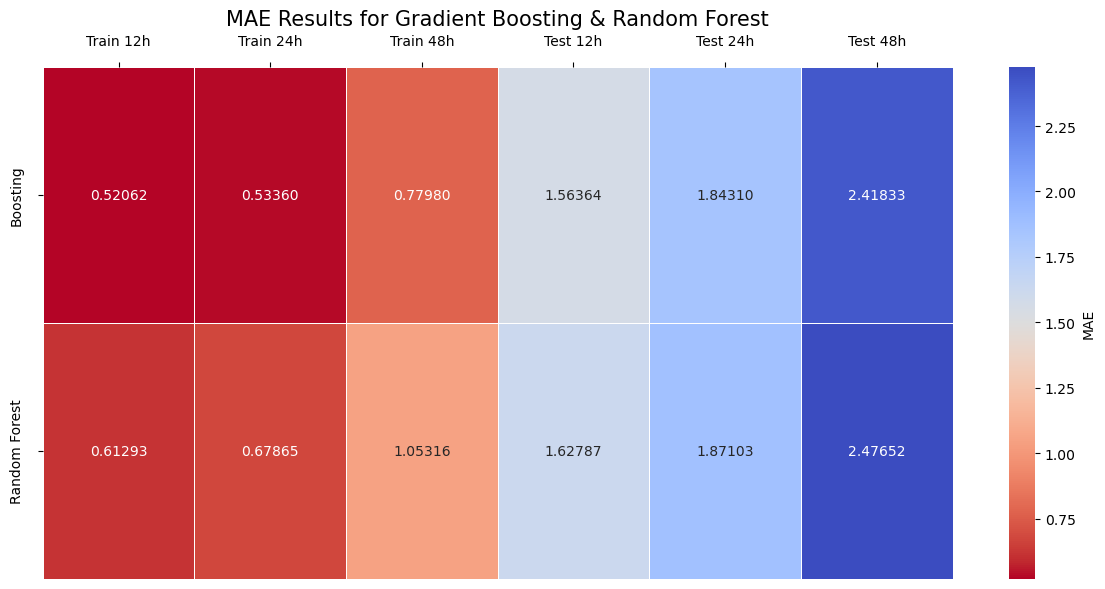

In [96]:
mae_data_tree = {

    "Boosting": {
        "Train 12h": train_mae_gb12,
        "Train 24h": train_mae_gb24,
        "Train 48h": train_mae_gb48,
        "Test 12h":  test_mae_gb12,
        "Test 24h":  test_mae_gb24,
        "Test 48h":  test_mae_gb48,
    },

    "Random Forest": {
        "Train 12h": train_mae_rf12h,
        "Train 24h": train_mae_rf24h,
        "Train 48h": train_mae_rf48h,
        "Test 12h":  test_mae_rf12h,
        "Test 24h":  test_mae_rf24h,
        "Test 48h":  test_mae_rf48h,
    }
}

df = pd.DataFrame(mae_data_tree).T

plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    df, annot=True, fmt=".5f",
    cmap=sns.color_palette("coolwarm_r", as_cmap=True),
    linewidths=0.5, cbar=True, cbar_kws={"label": "MAE"}
)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(top=True, bottom=False, pad=10)

plt.title("MAE Results for Gradient Boosting & Random Forest", fontsize=15, pad=30)

plt.tight_layout()
plt.show()




# 11. Summary table grouping everything 

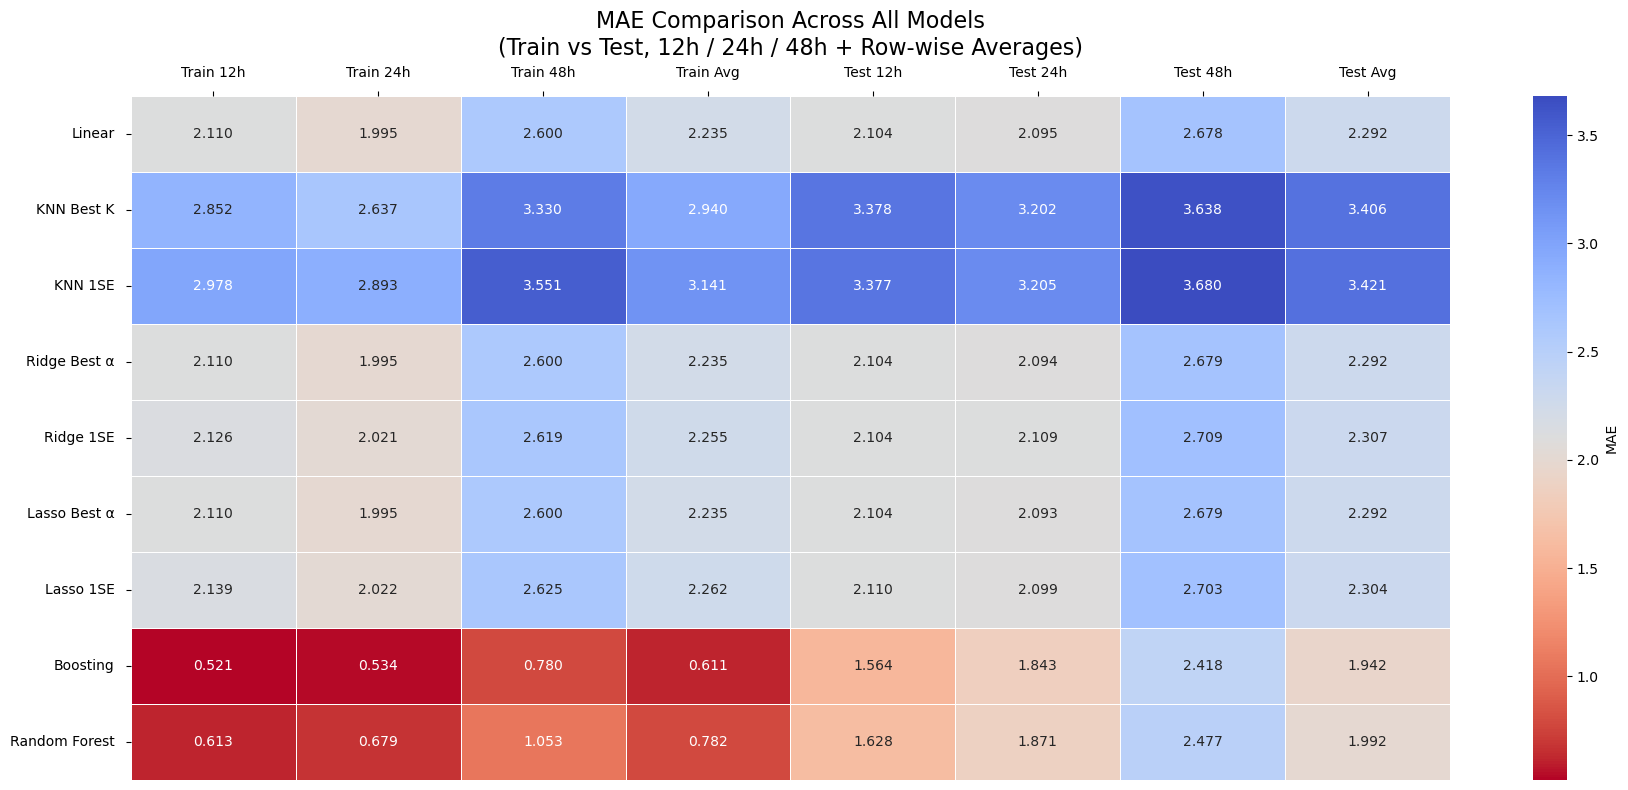

In [ ]:
mae_data_all = {}
mae_data_all.update(mae_data_ml)    # Linear, KNN, Ridge, Lasso
mae_data_all.update(mae_data_tree)  # Gradient Boosting, Random Forest

df_all = pd.DataFrame(mae_data_all).T

# Reorder columns
df_all = df_all[
    [
        "Train 12h", "Train 24h", "Train 48h",
        "Test 12h", "Test 24h", "Test 48h"
    ]
]

# Calculate row-wise averages
df_all["Train Avg"] = df_all[["Train 12h", "Train 24h", "Train 48h"]].mean(axis=1)
df_all["Test Avg"]  = df_all[["Test 12h", "Test 24h", "Test 48h"]].mean(axis=1)

# Reorder columns again to place averages columns at the right place
df_all = df_all[
    [
        "Train 12h", "Train 24h", "Train 48h", "Train Avg",
        "Test 12h", "Test 24h", "Test 48h", "Test Avg"
    ]
]

# Plot heatmap for all models
plt.figure(figsize=(18, 8))

ax = sns.heatmap(
    df_all,
    annot=True,
    fmt=".3f",
    cmap=sns.color_palette("coolwarm_r", as_cmap=True),
    linewidths=0.5,
    cbar=True,
    cbar_kws={"label": "MAE"})

ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.tick_params(top=True, bottom=False, pad=8)


plt.title(
    "MAE Comparison Across All Models\n"
    "(Train vs Test, 12h / 24h / 48h + Row-wise Averages)",
    fontsize=16,
    pad=30)

plt.tight_layout()
plt.show()

# 12. KAGGLE SUMBISION 



In [ ]:
# Load the data 

weather_test = pd.read_csv(" INSERT TEST FILE PATH HERE ")
weather_test = weather_test.astype({'season': 'category'})

# Cyclic hour encoding
max_hour = 24
weather_test["hour_sin"] = np.sin(2 * np.pi * weather_test["hour"] / max_hour)
weather_test["hour_cos"] = np.cos(2 * np.pi * weather_test["hour"] / max_hour)

# Seasonal hourly mean and std
weather_test["mean_season_hour"] = (weather_test.groupby(["season", "hour"])["tre200h0"].transform("mean"))

weather_test["std_season_hour"] = (weather_test.groupby(["season", "hour"])["tre200h0"].transform("std"))

# Temperature anomaly 
weather_test["temp_anomaly"] = (weather_test["tre200h0"] - weather_test["mean_season_hour"])

# Drop hour
weather_test = weather_test.drop(columns=["hour"])

# Drop NaNs
weather_test = weather_test.dropna().reset_index(drop=True)

# Prepare test feature set
feature_cols_nonlinear = [
    col for col in weather_test.columns if "target" not in col
]

# Create dummies
X_test_nonlinear = pd.get_dummies(
    weather_test[feature_cols_nonlinear],
    drop_first=True
)

# Reindex test set to match training set columns
X_test_nonlinear = X_test_nonlinear.reindex(
    columns=X_train_nonlinear.columns,
    fill_value=0
)

best_params_gb_24h = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

best_gb_24h = GradientBoostingRegressor(
    **best_params_gb_24h,
    random_state=1
)

# Fit on full training data
best_gb_24h.fit(X_train_nonlinear, y24_train_nonlinear)

# Predict on test data
y24_pred_submission = best_gb_24h.predict(X_test_nonlinear)


# SUMBIT ON KAGGLE

submission_24h = pd.DataFrame({
    "Id": weather_test["Id"],
    "target_tre200h0_plus24h": y24_pred_submission
})

# save CSV 

output_path = "/Users/kaloyan/Downloads/Kaggle_Submission1.csv" <- INSERT DESIRED OUTPUT PATH HERE

submission_24h.to_csv(output_path, index=False)








/var/folders/nr/bgsshsks2k3ct2nhfbl7tldr0000gn/T/ipykernel_62040/491903683.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_test["mean_season_hour"] = (weather_test.groupby(["season", "hour"])["tre200h0"].transform("mean"))
/var/folders/nr/bgsshsks2k3ct2nhfbl7tldr0000gn/T/ipykernel_62040/491903683.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_test["std_season_hour"] = (weather_test.groupby(["season", "hour"])["tre200h0"].transform("std"))


NameError: name 'X_train_nonlinear' is not defined